# Predicting Risk of coronary heart disease

## Machine Learning Life cycle

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis(EDA)
* Data cleaning
* Data preprocessing
* Model Training
* Selecting best model

## About
* Coronary heart disease (CHD) is a major source of morbidity and death globally. Millions of people are impacted by CHD, making it a serious public health issue. Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greatly improve their prognoses.




# 1. Problem Statement

* The Framingham Cardiovascular Disease (CVD) dataset, originating from the Framingham Heart Study initiated in 1948, is a rich resource for understanding cardiovascular health and risk factors.
* The dataset comprises a wide array of health-related data collected from participants over several decades which Includes diverse variables such as demographic information, medical history, lifestyle factors (e.g., smoking habits, physical activity), clinical measurements (e.g., blood pressure, cholesterol levels), and disease incidence.

**Main Moto**
* Build Machine Learning models to predict the patient is having risk of coronary heart disease for next 10 years.
* Pick the best model and build an web application using stream lit so that the end users can have access to the prediction with some basic features.


# 2. Data Collection


* This dataset consist of infomation about patients from farmingham.
* Data consits of 4240 Rows and 16 Columns(15 Feature variables, 1 Target variable)

Dataset Link: [https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset](https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset)



**Atrributes of the DataFrame**
* **Sex:** Either the Patient is Male or Female.
* **Age:** Age of the patient.
* **Current Smoker:** Wheather patient is smoking or not.
* **Cigs per day:** Number of cigerates consumed by the patient everyday.
* **BP meds:** Patient under blood pressure medication or not.
* **Prevalent Stroke:** Patient previouslty is having a stroke.
* **Prevalent Hyp:** Patient having Hypertension or not.
* **Diabetes:** Patient having diabetes or not.
* **Tot Chol:** Total cholesterol level
* **Sys BP:** systolic blood pressure of the patient.
* **Dia BP:** diastolic blood pressure of the patient.
* **BMI:** Body masss index of the patient.
* **Heart rate:** heartrate of the patient.
* **Glucose:** glucose level of the patient.
* **TenYearCHD:** Risk in of  coronary heart disease(CHD) in 10 years.

## 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from operator import add
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,r2_score,confusion_matrix,classification_report,roc_auc_score,recall_score,f1_score

**Connecting Google drive**
* comment down if using in Jupyter Notebook or VScode

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

**Loading the dataset as a DataFrame and displaying first 5 Rows**

In [3]:
data = pd.read_csv('framingham.csv')
data.head()

sex  age  education currentSmoker  cigarettes_per_day BP_medication  \
0    Male   39        4.0            No                 0.0            No   
1  Female   46        2.0            No                 0.0            No   
2    Male   48        1.0           Yes                20.0            No   
3  Female   61        3.0           Yes                30.0            No   
4  Female   46        3.0           Yes                23.0            No   

  prevalentStroke prevalentHyp diabetes  total_cholestrol  systolic_BP  \
0              No           No       No             195.0        106.0   
1              No           No       No             250.0        121.0   
2              No           No       No             245.0        127.5   
3              No          Yes       No             225.0        150.0   
4              No           No       No             285.0        130.0   

   diastolic_BP    BMI  heart_rate  glucose risk_of_CHD  
0          70.0  26.97        80.0     77.0          No  
1          81.0  28.73        95.0     76.0          No  
2          80.0  25.34        75.0     70.0          No  
3          95.0  28.58        65.0    103.0         Yes  
4          84.0  23.10        85.0     85.0          No

**Shape of the Dataframe**

In [4]:
#The dataset consists total of 16 features including target variable.
print(f'Shape of the dataframe: {data.shape}')

Shape of the dataframe: (4240, 16)


**Renaming columns for better readability**

In [5]:
# Renaming of the column values for readability:

data.rename(columns= {'male': 'sex',
                      'currentSmokes': 'smokes_current',
                      'cigsPerDay': 'cigarettes_per_day',
                      'BPMeds':'BP_medication',
                      'prevalentStroke': 'prevalentStroke',
                      'prevalentHyp': 'prevalentHyp',
                      'totChol': 'total_cholestrol',
                      'sysBP': 'systolic_BP',
                      'diaBP': 'diastolic_BP',
                      'heartRate':'heart_rate',
                      'TenYearCHD':'risk_of_CHD'},inplace=True)

**Creating New feature**

In [6]:
#combining the attributes systolic and diastolic to the category Mean Arterial Pressure (MAP)which is average arterial pressure throughout one cardiac cycle
data['MAP'] = ((2* data['diastolic_BP']) + data['systolic_BP']) / 3

mapMin,mapMax = int(data['MAP'].min()),int(data['MAP'].max())
print(f'MAP - mean arterial pressure:\nMinimum:{mapMin}\nMaximum{mapMax}')

data.drop(['systolic_BP', 'diastolic_BP'], axis=1,inplace = True)

MAP - mean arterial pressure:
Minimum:62
Maximum188


**Summary of the Dataset**

In [7]:
data.describe()

age    education  cigarettes_per_day  total_cholestrol  \
count  4240.000000  4135.000000         4211.000000       4190.000000   
mean     49.580189     1.979444            9.005937        236.699523   
std       8.572942     1.019791           11.922462         44.591284   
min      32.000000     1.000000            0.000000        107.000000   
25%      42.000000     1.000000            0.000000        206.000000   
50%      49.000000     2.000000            0.000000        234.000000   
75%      56.000000     3.000000           20.000000        263.000000   
max      70.000000     4.000000           70.000000        696.000000   

               BMI   heart_rate      glucose          MAP  
count  4221.000000  4239.000000  3852.000000  4240.000000  
mean     25.800801    75.878981    81.963655    99.383373  
std       4.079840    12.025348    23.954335    14.436880  
min      15.540000    44.000000    40.000000    62.500000  
25%      23.070000    68.000000    71.000000    89.500000  
50%      25.400000    75.000000    78.000000    97.333333  
75%      28.040000    83.000000    87.000000   107.166667  
max      56.800000   143.000000   394.000000   188.333333

**Datatypes in dataset**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 4240 non-null   object 
 1   age                 4240 non-null   int64  
 2   education           4135 non-null   float64
 3   currentSmoker       4240 non-null   object 
 4   cigarettes_per_day  4211 non-null   float64
 5   BP_medication       4187 non-null   object 
 6   prevalentStroke     4240 non-null   object 
 7   prevalentHyp        4240 non-null   object 
 8   diabetes            4240 non-null   object 
 9   total_cholestrol    4190 non-null   float64
 10  BMI                 4221 non-null   float64
 11  heart_rate          4239 non-null   float64
 12  glucose             3852 non-null   float64
 13  risk_of_CHD         4240 non-null   object 
 14  MAP                 4240 non-null   float64
dtypes: float64(7), int64(1), object(7)
memory usage: 497.0+

* Education is a oridnal variable but has a wrong datatype so changing that to categorical for further analysis

In [9]:
data['education'] = data['education'].astype('object')

# 3. Exploring Data

In [10]:
categorical_features = [value for value in data.columns if data[value].dtype == 'object']
numerical_features = [value for value in data.columns if data[value].dtype != 'object']

print(f'Total numerical features are {len(numerical_features)} they are as follows: \n{numerical_features}')
print(f'Total categorical features are {len(categorical_features)} they are as follows: \n{categorical_features}')

Total numerical features are 7 they are as follows: 
['age', 'cigarettes_per_day', 'total_cholestrol', 'BMI', 'heart_rate', 'glucose', 'MAP']
Total categorical features are 8 they are as follows: 
['sex', 'education', 'currentSmoker', 'BP_medication', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'risk_of_CHD']


In [11]:
for col in categorical_features:
  print(f'{col.capitalize()}:')
  print(100 * data[col].value_counts(normalize = True))
  print('--'*45)

Sex:
sex
Female    57.075472
Male      42.924528
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------
Education:
education
1.0    41.596131
2.0    30.302297
3.0    16.662636
4.0    11.438936
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------
Currentsmoker:
currentSmoker
No     50.589623
Yes    49.410377
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------
Bp_medication:
BP_medication
No     97.038452
Yes     2.961548
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------
Prevalentstroke:
prevalentStroke
No     99.410377
Yes     0.589623
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------
Prevalenthyp:
prevalentHyp
No     68.938679
Yes  

**Insights**
* `Sex` and `Currentsmoker` are the columns which are having data balanced with 50 : 50 percentage.
* `Education`: Most of the patients fall under the category 1 or 2 with 71 percentage of the whole.
* `Bp_mdication`,`Prevalentstroke`,`PrevalentHyp`,`Diabetes` and `Risk_of_CHD` are the columns are more important to predict the Risk for CHD and also we can observe that most of the values are tend towards No which can give us a sign that the dataset is Imbalanced, we check for more in the further analysis and balance the dataset with various techniques.

### Handling Null values

In [12]:
# Total percentage of null values
null_value_count = data.isnull().sum()
print('Percentage of missing values in the DataFrame: {:.3%}'.format(null_value_count.sum()/len(data)))

Percentage of missing values in the DataFrame: 15.212%


**Showing percentage of null values in the DataFrame**

In [13]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

Total  Percentage
glucose               388    9.150943
education             105    2.476415
BP_medication          53    1.250000
total_cholestrol       50    1.179245
cigarettes_per_day     29    0.683962
BMI                    19    0.448113
heart_rate              1    0.023585

**Exploring all the null value rows**

In [14]:
#identifying and counting null values of the dataframe
null_rows = data[data.isnull().any(axis=1)]
print("Total number of Null values {}".format(len(null_rows)))
null_rows

Total number of Null values 582


sex  age education currentSmoker  cigarettes_per_day BP_medication  \
14    Female   39       2.0           Yes                 9.0            No   
21    Female   43       1.0            No                 0.0            No   
26    Female   60       1.0            No                 0.0            No   
33      Male   61       NaN           Yes                 5.0            No   
36      Male   56       NaN            No                 0.0            No   
...      ...  ...       ...           ...                 ...           ...   
4208  Female   51       1.0           Yes                 9.0            No   
4229  Female   51       3.0           Yes                20.0            No   
4230  Female   56       1.0           Yes                 3.0            No   
4235  Female   48       2.0           Yes                20.0           NaN   
4236  Female   44       1.0           Yes                15.0            No   

     prevalentStroke prevalentHyp diabetes  total_cholestrol    BMI  \
14                No           No       No             226.0  22.35   
21                No           No       No             185.0  29.89   
26                No           No       No             260.0  26.59   
33                No           No       No             175.0  18.59   
36                No           No       No             257.0  28.09   
...              ...          ...      ...               ...    ...   
4208              No           No       No             340.0  25.74   
4229              No          Yes       No             251.0  25.60   
4230              No          Yes       No             268.0  22.89   
4235              No           No       No             248.0  22.00   
4236              No           No       No             210.0  19.16   

      heart_rate  glucose risk_of_CHD         MAP  
14          85.0      NaN          No   80.666667  
21          70.0      NaN          No   92.833333  
26          65.0      NaN          No   85.000000  
33          72.0     75.0         Yes   99.666667  
36          72.0     75.0          No  119.166667  
...          ...      ...         ...         ...  
4208        70.0      NaN          No  101.333333  
4229        75.0      NaN          No  100.000000  
4230        57.0      NaN          No  124.666667  
4235        84.0     86.0          No   91.666667  
4236        86.0      NaN          No  100.166667  

[582 rows x 15 columns]

In [15]:
missing_data

Total  Percentage
glucose               388    9.150943
education             105    2.476415
BP_medication          53    1.250000
total_cholestrol       50    1.179245
cigarettes_per_day     29    0.683962
BMI                    19    0.448113
heart_rate              1    0.023585

In [16]:
# #plotting the percentage of null values using ggplot library
# plt.style.use('ggplot')
# plt.figure(figsize = (10,5))
# sns.barplot(data = missing_data,x = missing_data.index, y = missing_data['Percentage'],hue = missing_data.index)
# plt.xlabel('Features')
# plt.xticks(rotation = 90)
# plt.ylabel('Null value percentage')
# plt.title('Percentage of Null values in the Dataset',fontsize = 16)
# plt.show()

**Insights**
* Among all the attributes Glucose has the highest percentage of missing data - 9.15% followed by education,BPmeds and the rest have very few missing entries.

**Filling Null values using Mean and Mode**

In [17]:
columns = ['glucose','total_cholestrol','cigarettes_per_day','BMI']
for col in columns:
  data[col].fillna(data[col].mean(),inplace = True)

data['BP_medication'].fillna(data['BP_medication'].mode()[0],inplace = True)

# dropping rest of the null values
data.dropna(inplace = True)

* Filling Null values in Glucose,BPMeds,totalChol,cigersPerDay,BMI with the mean value and droppping rest of the null vlaues which are located in education,heartRate
* With education wont be a major cause for the disease while Heartrate is having only one missing value so we can drop them without any concern.

**Checking Null values for confirmation**

In [18]:
data.isnull().sum()

sex                   0
age                   0
education             0
currentSmoker         0
cigarettes_per_day    0
BP_medication         0
prevalentStroke       0
prevalentHyp          0
diabetes              0
total_cholestrol      0
BMI                   0
heart_rate            0
glucose               0
risk_of_CHD           0
MAP                   0
dtype: int64

* We have succesfully handled Null values.

## Univariate Analysis

* Univariate Analysis is analysis of a particular single variable in the dataframe to check the distribution of the values

### Numerical Features



*   Performing univariate analysis on the numerical features.



In [19]:
data[numerical_features].head()

age  cigarettes_per_day  total_cholestrol    BMI  heart_rate  glucose  \
0   39                 0.0             195.0  26.97        80.0     77.0   
1   46                 0.0             250.0  28.73        95.0     76.0   
2   48                20.0             245.0  25.34        75.0     70.0   
3   61                30.0             225.0  28.58        65.0    103.0   
4   46                23.0             285.0  23.10        85.0     85.0   

          MAP  
0   82.000000  
1   94.333333  
2   95.833333  
3  113.333333  
4   99.333333

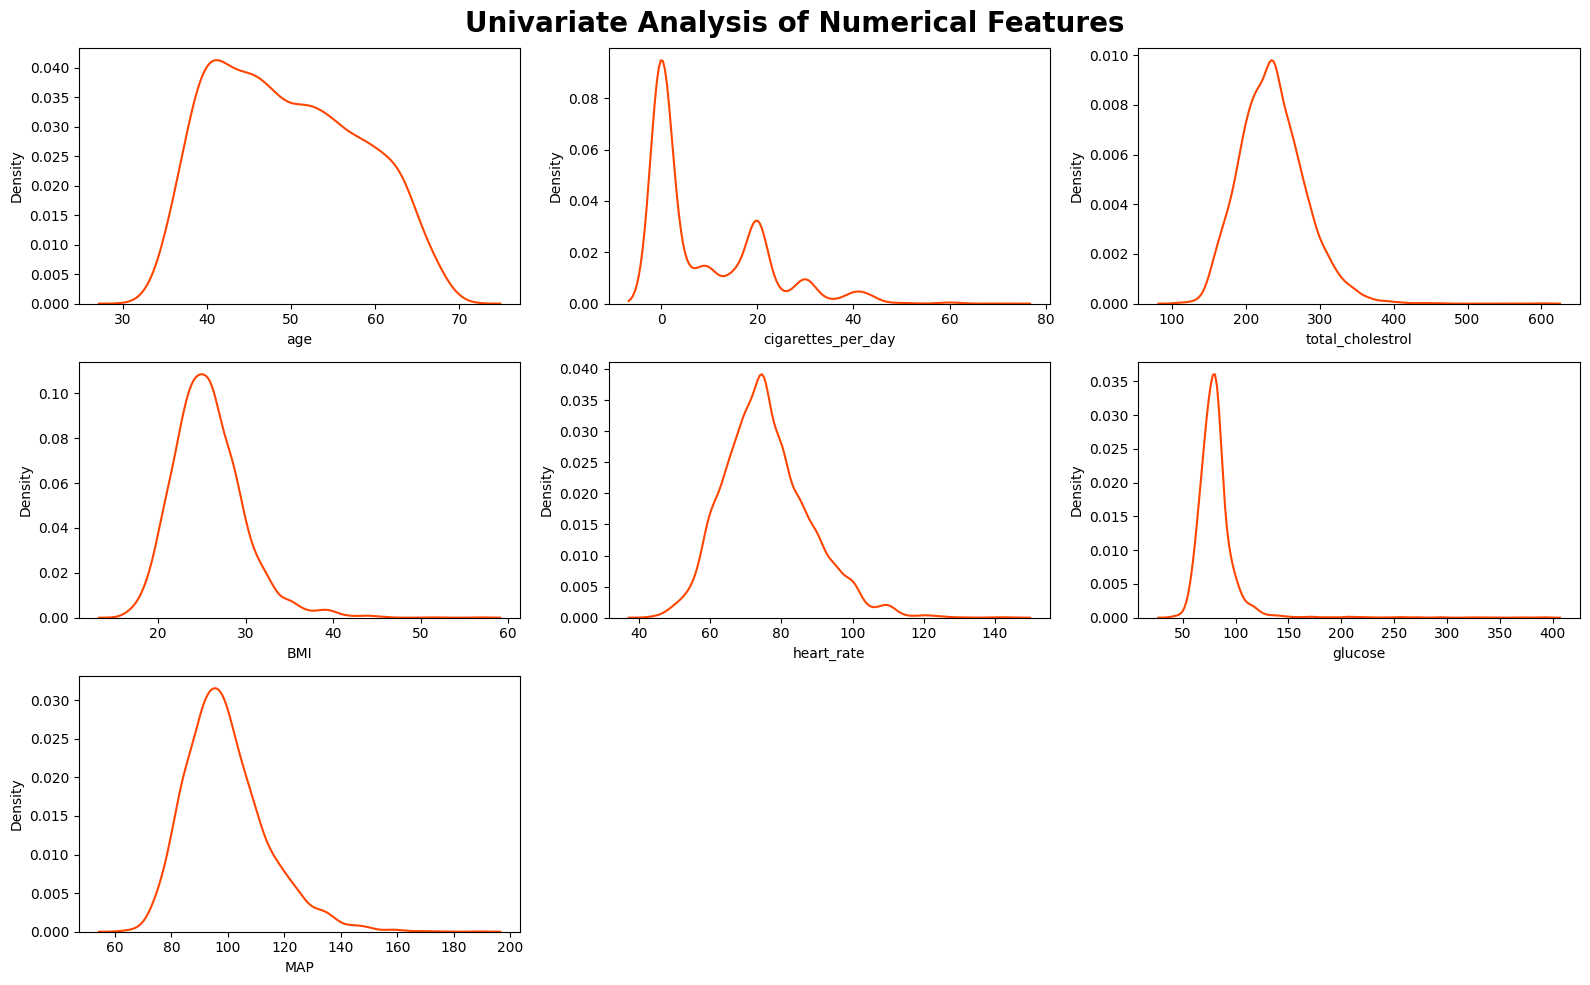

In [20]:
plt.figure(figsize = (16,10))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize = 20, fontweight = 'bold')

#creating a density plot using kdeplot() function from the seaborn lib
for val in range(0, len(numerical_features)):
  plt.subplot(3, 3, val + 1)
  sns.kdeplot(x = data[numerical_features[val]], color = 'orangered')
  plt.xlabel(numerical_features[val])
  plt.tight_layout()


**Insights**
* `glucose` looks more skewed maybe it is due to outliers.
* Attributes such as `cigarettes_per_day`, `total_cholestrol`, `MAP`, `BMI`,  are skewed towards right.
* Atribute `age` is perfectly distributed among the axis.
* `Heart_rate` is slightly skewed towards right.

### Categorical Features

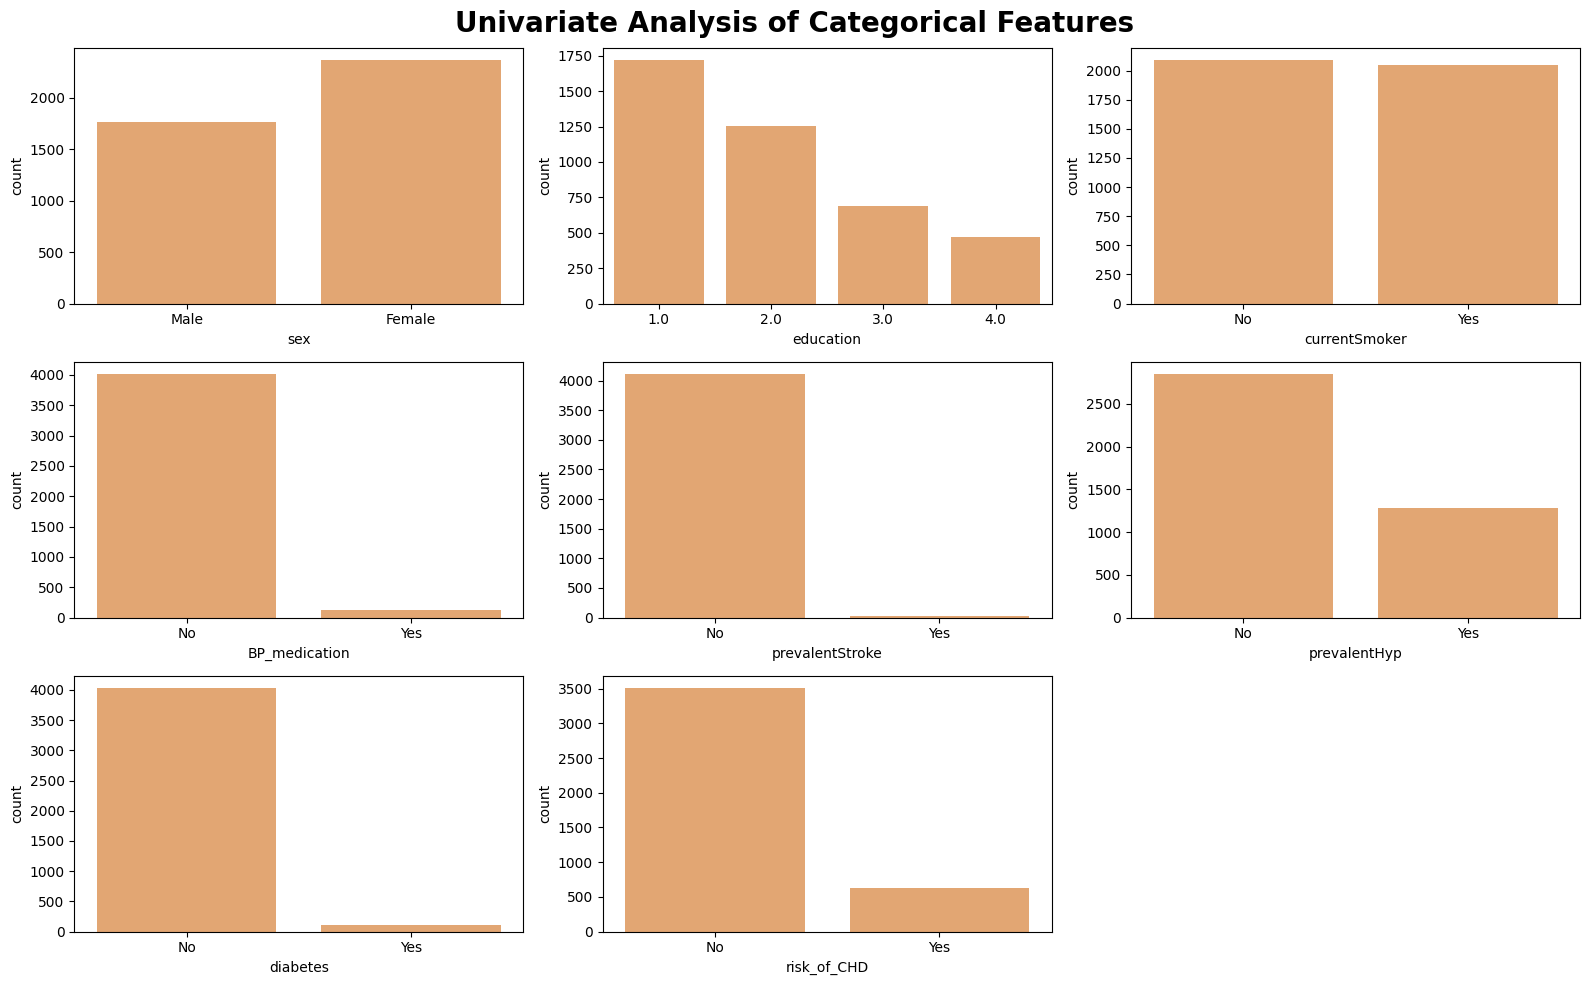

In [21]:
plt.figure(figsize = (16,10))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize = 20, fontweight = 'bold')

#creating subplots of countplots for each categorical feature
for val in range(0, len(categorical_features)):
  plt.subplot(3, 3, val + 1)
  sns.countplot(x = data[categorical_features[val]], color = 'sandybrown')
  plt.xlabel(categorical_features[val])
  plt.tight_layout()

**Insights**
* `sex`,`currentSmoker` are the attributes where the data is equally distributed.
* Approximately 70% of the values in the `education` attribute fall into categories 1 and 2. Rest belonging to categories 3 and 4.
* Here we can observe that the attributes like `BP_medication`, `prevalentStroke`,`prevalentHyp`,`diabetes`,`risk_of_CHD` are having single category(No) domining, which needs to be handled in the later analysis.
* Most importantly the Target Variable `Risk for CHD` is imbalanced which will be a issue while training the model, will be handled in further analysis using imblearn.

## Multivariate Analysis

* Analysis of more than 1 variable is called as multivariate analysis.

In [22]:
#creating a function to categorizes numerical features into discrete or continuous types and prints their counts and names
discreate_features,continous_features = [],[]
def get_numerical_feature_type(data):
  for val in numerical_features:
    if len(data[val].unique()) < 10:
      discreate_features.append(val)
    else:
      continous_features.append(val)

get_numerical_feature_type(data)

print(f"Number of Discrete Features: {len(discreate_features)}\nThey are: {discreate_features}")
print(f"Number of Continous Features: {len(continous_features)}\nThey are: {continous_features}")

Number of Discrete Features: 0
They are: []
Number of Continous Features: 7
They are: ['age', 'cigarettes_per_day', 'total_cholestrol', 'BMI', 'heart_rate', 'glucose', 'MAP']


## **Multicollinearity**

### Checking Multicollinearity for Categorical Features

* Chi-square test is used to check for the correlation between two categorical variables.
* We test the correlation of Categorical columns with Target column Risk of CHD.



* Defining null hypothesis and alternate hypothesis:
1. H₀(Null Hypothesis) -  that the 2 categorical variables to be compared are independent of each other.
2. H₁ (Alternate Hypothesis) - that the 2 categorical variables being compared are dependent on each other.


* We draw your conclusions based on the following
p-value conditions:



1. p < 0.05 — this means the two categorical variables are not correlated.
2. p > 0.05 — this means the two categorical variables are correlated.

In [23]:
from scipy.stats import chi2_contingency
test_result = []
#Iterating through the categorical features
for value in categorical_features:
    if chi2_contingency(pd.crosstab(data['risk_of_CHD'], data[value]))[1] < 0.05:
        test_result.append('Reject Null Hypothesis')
    else:
        test_result.append('Fail to Reject Null Hypothesis')
multicollinearity_test = pd.DataFrame(data=[categorical_features, test_result]).T
multicollinearity_test.columns = ['Column', 'Result']
multicollinearity_test

Column                          Result
0              sex          Reject Null Hypothesis
1        education          Reject Null Hypothesis
2    currentSmoker  Fail to Reject Null Hypothesis
3    BP_medication          Reject Null Hypothesis
4  prevalentStroke          Reject Null Hypothesis
5     prevalentHyp          Reject Null Hypothesis
6         diabetes          Reject Null Hypothesis
7      risk_of_CHD          Reject Null Hypothesis

**Insights**
* `currentSmoker` fails to Reject Null hypothesis which tells us that it is not correlated with other target feature.

* As the p-values are < 0.05 for rest of the variables, we can conclude that these features are correlated to the target variable, and should be included for training the model.



### Checking multicollinearity for Numerical Features

In [24]:
# load statmodels functions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = data[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [25]:
considered_features = ['age', 'cigarettes_per_day', 'total_cholestrol', 'BMI', 'heart_rate', 'glucose', 'MAP']
# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

Variable       VIF
6                 MAP  1.329890
0                 age  1.221468
3                 BMI  1.170691
2    total_cholestrol  1.102871
4          heart_rate  1.064067
1  cigarettes_per_day  1.051399
5             glucose  1.027755

### Checking for outliers

**Box plot for checking Outliers**

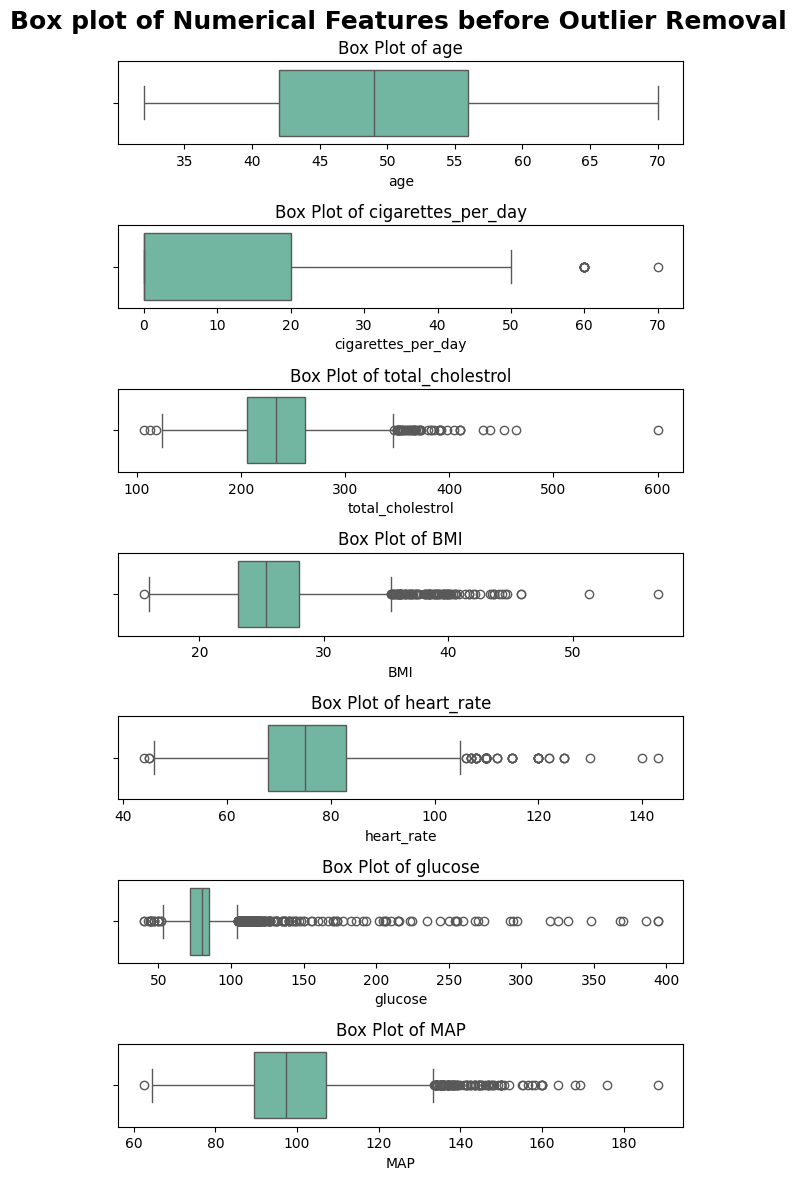

In [26]:
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(6, 12))
fig.suptitle('Box plot of Numerical Features before Outlier Removal',fontsize = 18, fontweight = 'bold',ha = 'center')
# Plot each numerical column as a boxplot
color = 'Set2'
for i, col in enumerate(numerical_features):
    sns.boxplot(data=data, x=col, ax=axes[i], palette=color)
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


**Removal of Outliers using IQR - Inter Quartile Range**

In [27]:
numerical_cols = ['age', 'cigarettes_per_day', 'total_cholestrol', 'BMI', 'heart_rate', 'glucose','MAP']

for column in numerical_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [28]:
print("Number of rows after outlier removal: {}".format(data.shape[0]))

Number of rows after outlier removal: 3562


**Plotting Box Plot after Outlier Removal**

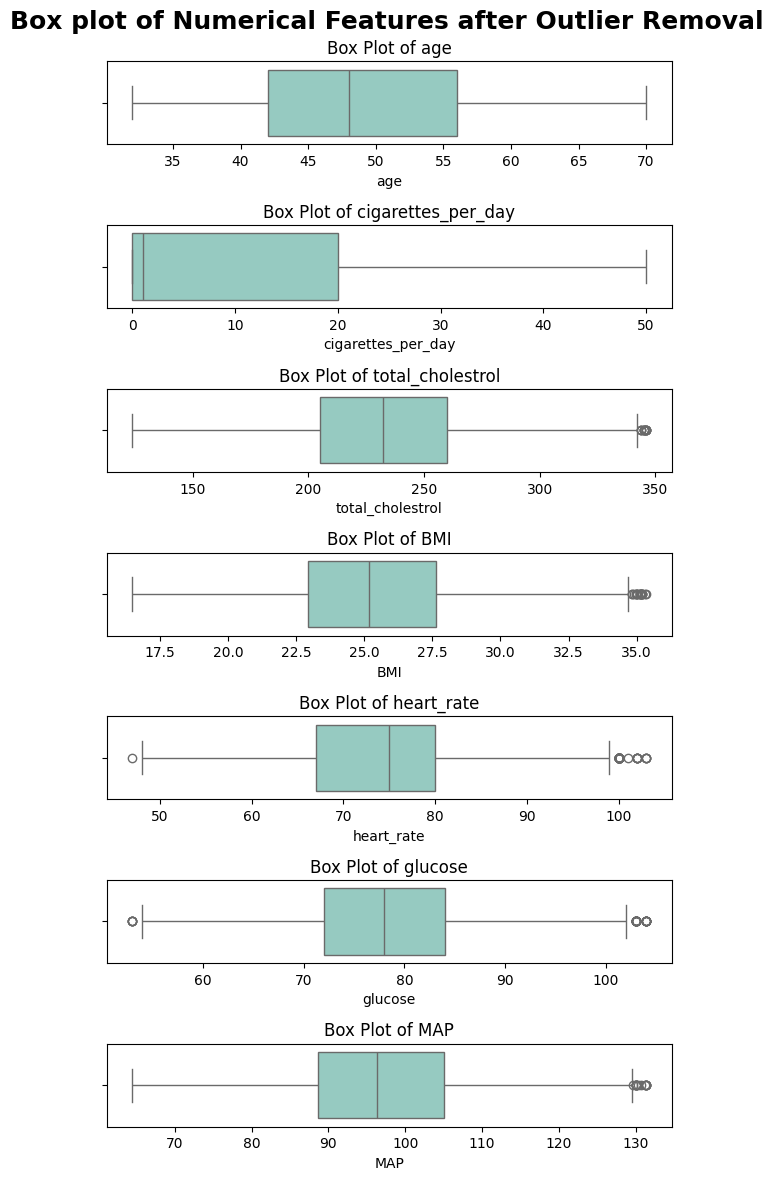

In [29]:
fig, axes = plt.subplots(nrows=len(numerical_features), figsize=(6, 12))
fig.suptitle('Box plot of Numerical Features after Outlier Removal',fontsize = 18, fontweight = 'bold',ha = 'center')
color = 'Set3'
for i, col in enumerate(numerical_features):
    sns.boxplot(data=data, x=col, ax=axes[i], palette=color)
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


* Here we can observe that most of the outliers are removed using IQR

**Checking number of unique values in features**

In [30]:
cols = data.columns
for col in cols:
  print(f'Number of unique values in {col}:',data[col].nunique())

Number of unique values in sex: 2
Number of unique values in age: 39
Number of unique values in education: 4
Number of unique values in currentSmoker: 2
Number of unique values in cigarettes_per_day: 32
Number of unique values in BP_medication: 2
Number of unique values in prevalentStroke: 2
Number of unique values in prevalentHyp: 2
Number of unique values in diabetes: 2
Number of unique values in total_cholestrol: 207
Number of unique values in BMI: 1189
Number of unique values in heart_rate: 56
Number of unique values in glucose: 53
Number of unique values in risk_of_CHD: 2
Number of unique values in MAP: 341


In [31]:

data.to_csv('updated_data.csv', index=False)  # Set index=False if you don't want to write row indices


# **4. Visualization**

**Visualization of Target Feature**

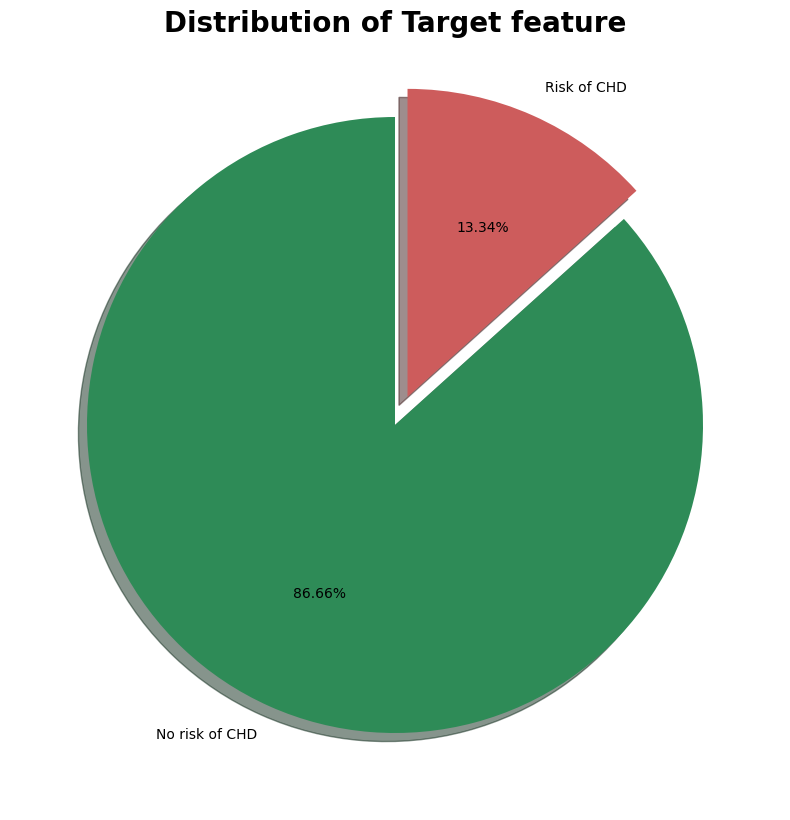

In [32]:
percentage = 100 *data.risk_of_CHD.value_counts(normalize=True)

plt.figure(figsize =(12, 10))
labels = ["No risk of CHD","Risk of CHD"]
explode = (0, 0.1)
colors = ['seagreen','indianred']
plt.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.title('Distribution of Target feature', fontsize = 20, fontweight = 'bold',ha = 'center')
plt.show()

* We can observe that out of 100 patients 86 people has no risk for Coronary Heart Disease, which tells that the dataset is imbalanced(Uneven distribution of records).

**Data distribution of numerical features for Risk of CHD true**

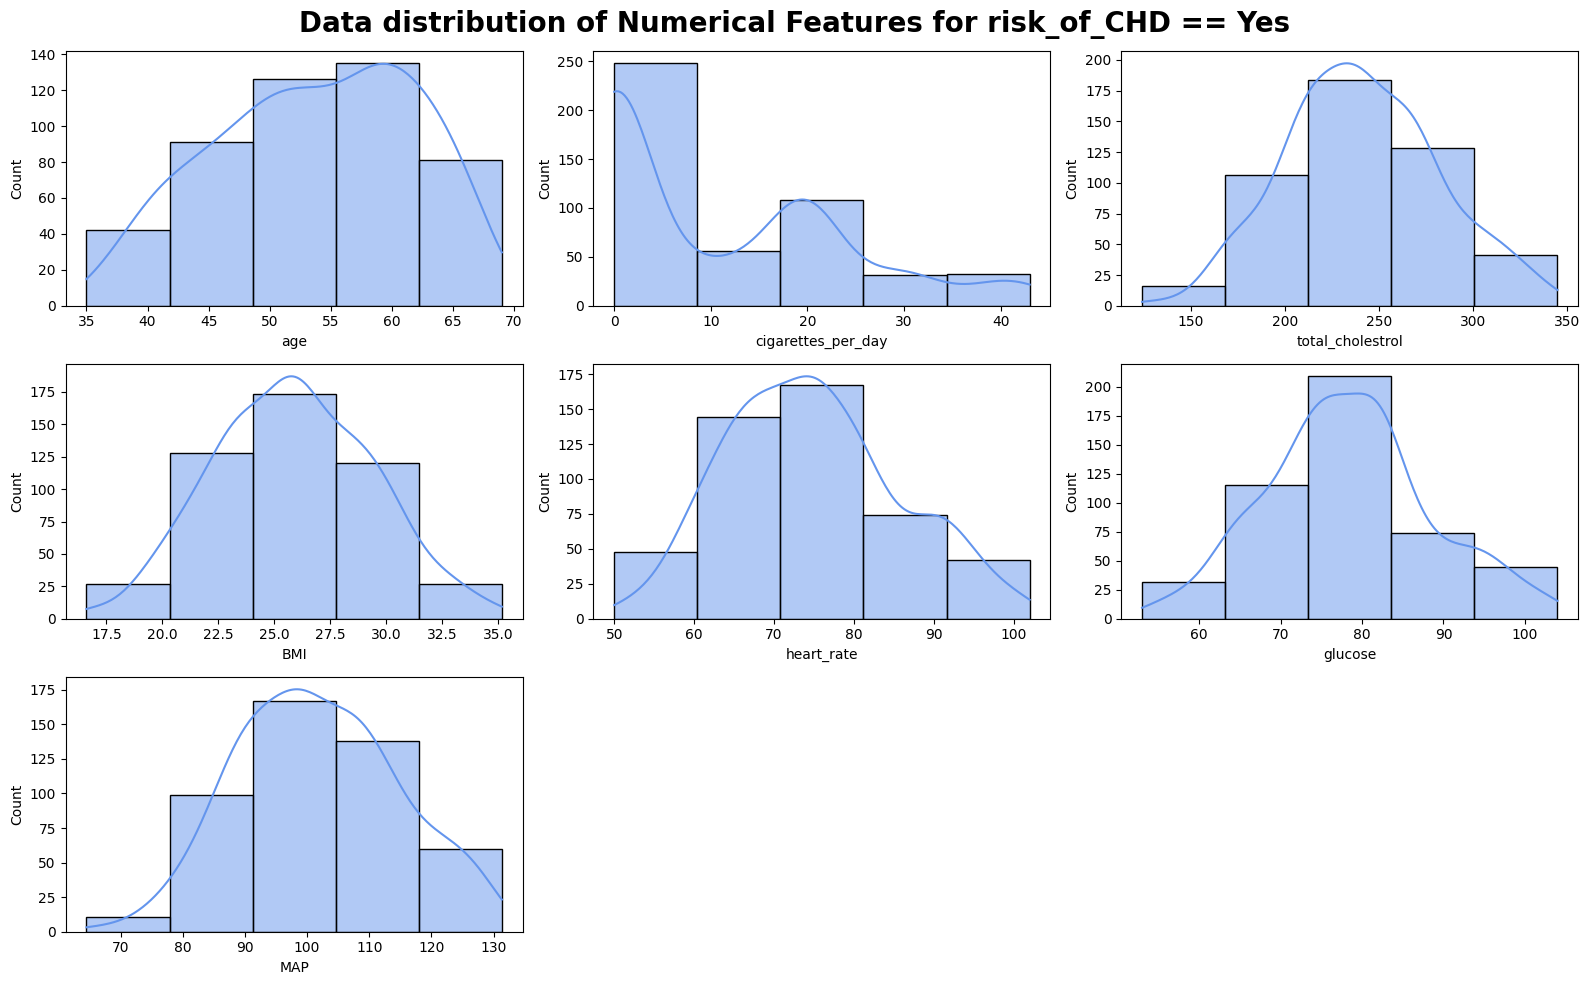

In [33]:
plt.figure(figsize = (16,10))
plt.suptitle('Data distribution of Numerical Features for risk_of_CHD == Yes',fontsize = 20, fontweight = 'bold')
risk_data = data[data['risk_of_CHD'] == 'Yes']

for val in range(0, len(numerical_features)):
  plt.subplot(3, 3, val + 1)
  sns.histplot(data=risk_data, x=numerical_features[val], bins=5, color='cornflowerblue', kde=True)
  plt.xlabel(numerical_features[val])
  plt.tight_layout()

* `Age column`: Compared to all the ages people who are from age 51 and above are having high chance of Cardio vascular disease.
* `Heartrate`: People who are having Heartrate form 70-81 are having high chance of CHD compare to all the other categories.
* `Glucose`: People who are having Glucose level from 73-84 are having high chance of CHD compared to all other categories.
* `Choelstrol`: People who are having Choelstrol from 212-300 are having high chance of CHD comapre to other categories.
* `BMI`: People who are having Body mass index from 24-31 are having high chance of CHD compared to others categories.

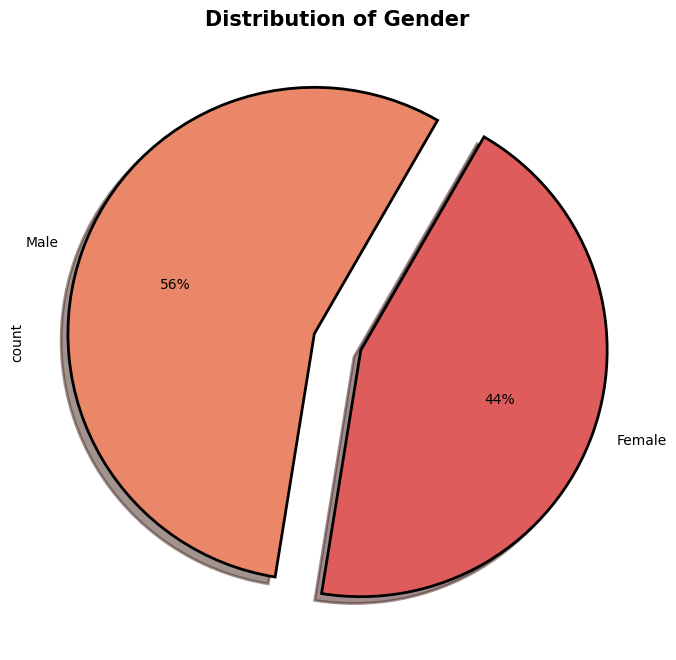

In [34]:
plt.figure(figsize=(10,8))
# plt.subplot(221)
risk_data["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("flare",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
# plt.title("Distribution of Gender")
# plt.subplot(222)
# ax= sns.distplot(data['age'], rug=True)
plt.title("Distribution of Gender",fontsize = 15, fontweight = 'bold')
plt.show()

* Sex: compared to females males are having more chance of having CHD over all other independent features.

**Count-plot of Target feature**

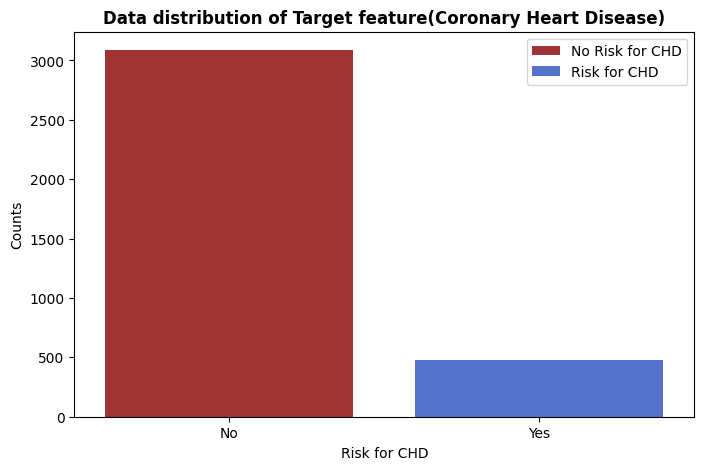

In [35]:
plt.figure(figsize = (8,5))
colors = ['firebrick','royalblue']
sns.countplot(x="risk_of_CHD",data=data,hue='risk_of_CHD',palette=colors)
plt.title('Data distribution of Target feature(Coronary Heart Disease)',fontsize = 12, fontweight = 'bold')
plt.xlabel('Risk for CHD')
plt.ylabel('Counts')
plt.legend(labels = ['No Risk for CHD','Risk for CHD'])
plt.show()

In [36]:
from jupyter_dash import JupyterDash  # pip install dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
from dash import dcc, html, callback
import plotly.express as px
import math

from dash import no_update
app = JupyterDash(__name__)
# Create server variable with Flask server object for use with gunicorn
server = app.server

columns = ['sex', 'age', 'education','currentSmoker', 'cigarettes_per_day',
           'BP_medication','prevalentStroke', 'prevalentHyp', 'diabetes', 'total_cholestrol','BMI','heart_rate','glucose','risk_of_CHD','MAP']

dd_new = dcc.Dropdown(id="grouped_chart", options=columns, value="Smoke", clearable=False)

def grouped_distribution(col_name="sex"):
    return px.histogram(data_frame=data,
                  x=col_name,
                  color="risk_of_CHD",
                  opacity = 0.9,
                  orientation = "v",
                  barmode = 'group',
                  width=800,height=600)

app.layout = html.Div(children=[
    html.Br(),
    html.P("Select Column:"),
    dd_new,
    dcc.Graph(id="grouped")
])

####################### CALLBACKS ################################
@app.callback(Output("grouped", "figure"), [Input("grouped_chart", "value"), ])
def update_histogram(grouped_chart):
    return grouped_distribution(grouped_chart)

app.run_server(debug=False)

Dash app running on http://127.0.0.1:8050/


## Feature Encoding and Scaling

In [37]:
X = data.drop('risk_of_CHD',axis = 1)
Y = data['risk_of_CHD']

In [38]:
# Convert 'education' column to float
X['education'] = X['education'].astype('float')

# Replace string values with binary encoding for columns 'sex', 'currentSmoker', 'BP_medication', 'prevalentStroke', 'prevalentHyp', 'diabetes'
X['sex'].replace({'Male': 1, 'Female': 0}, inplace=True)
X['currentSmoker'].replace({'Yes': 1, 'No': 0}, inplace=True)
X['BP_medication'].replace({'Yes': 1, 'No': 0}, inplace=True)
X['prevalentStroke'].replace({'Yes': 1, 'No': 0}, inplace=True)
X['prevalentHyp'].replace({'Yes': 1, 'No': 0}, inplace=True)
X['diabetes'].replace({'Yes': 1, 'No': 0}, inplace=True)
Y = Y.replace({'Yes': 1, 'No': 0})
from sklearn.preprocessing import MinMaxScaler

# Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
for col in numerical_features:
    scaler.fit(X[[col]])
    X[col] = scaler.transform(X[[col]])

X.head()


sex       age  education  currentSmoker  cigarettes_per_day  BP_medication  \
0    1  0.184211        4.0              0                0.00              0   
1    0  0.368421        2.0              0                0.00              0   
2    1  0.421053        1.0              1                0.40              0   
3    0  0.763158        3.0              1                0.60              0   
4    0  0.368421        3.0              1                0.46              0   

   prevalentStroke  prevalentHyp  diabetes  total_cholestrol       BMI  \
0                0             0         0          0.319820  0.555909   
1                0             0         0          0.567568  0.649179   
2                0             0         0          0.545045  0.469528   
3                0             1         0          0.454955  0.641229   
4                0             0         0          0.725225  0.350821   

   heart_rate   glucose       MAP  
0    0.589286  0.470588  0.261845  
1    0.857143  0.450980  0.446384  
2    0.500000  0.333333  0.468828  
3    0.321429  0.980392  0.730673  
4    0.678571  0.627451  0.521197

**Heatmap of all features**

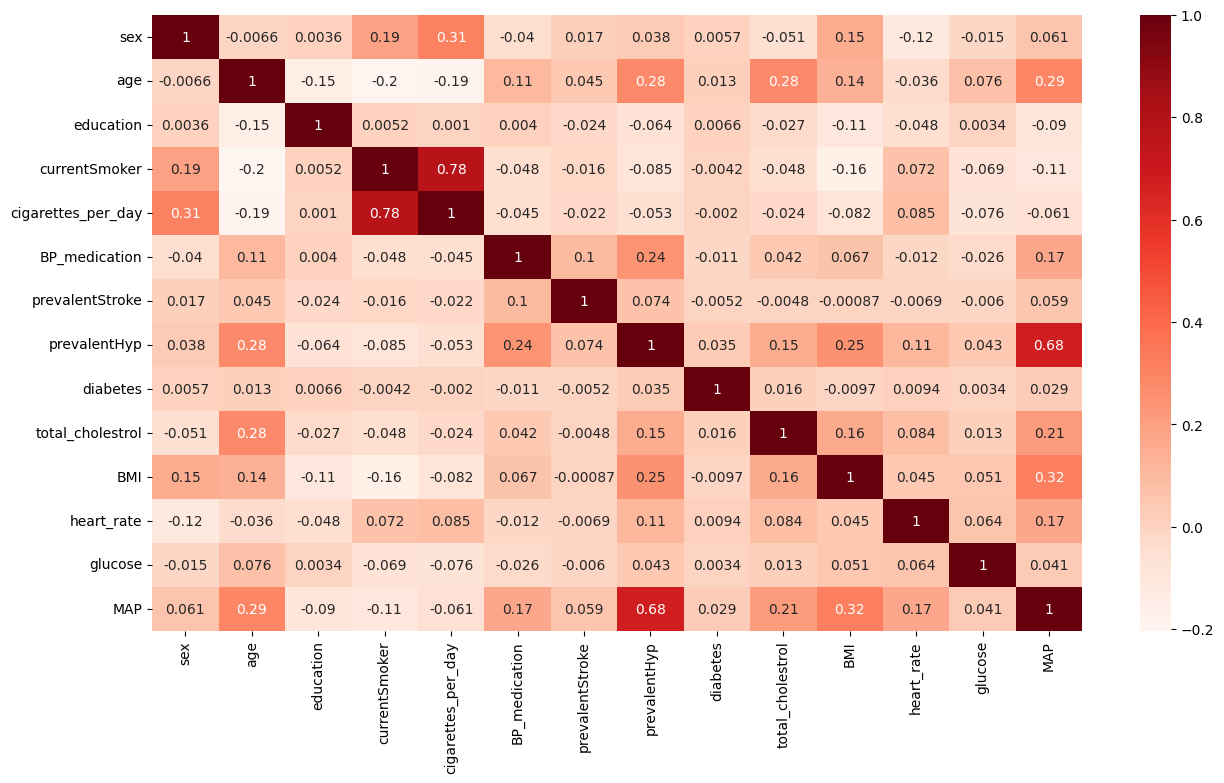

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(), annot = True,cmap = 'Reds')
plt.show()

**Feature Selection Using RandomForestClassifier**

In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe=RFE(estimator=RandomForestClassifier(),n_features_to_select=8)
rfe=rfe.fit(X,Y)

print("no.of features during fit : ",rfe.n_features_in_)
print("the optimal number of features:", rfe.n_features_)
print("Best features:", X.columns[rfe.support_])

no.of features during fit :  14
the optimal number of features: 8
Best features: Index(['age', 'education', 'cigarettes_per_day', 'total_cholestrol', 'BMI',
       'heart_rate', 'glucose', 'MAP'],
      dtype='object')


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay,accuracy_score

x_rfe=X[['age', 'education', 'cigarettes_per_day', 'total_cholestrol', 'BMI','heart_rate', 'glucose', 'MAP']]
y_rfe=Y
x_rfe_train,x_rfe_test,y_rfe_train,y_rfe_test=train_test_split(x_rfe,y_rfe,test_size=0.2,random_state=45)

rfc_rfe=RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=42)

rfc_rfe=rfc_rfe.fit(x_rfe_train,y_rfe_train)

y_rfe_pred=rfc_rfe.predict(x_rfe_test)
print("accuracy score for testing set :",accuracy_score(y_rfe_test,y_rfe_pred))

accuracy score for testing set : 0.8625525946704067


**Updating dataframe with selected features**

In [42]:
updated_df = X[['age', 'education', 'cigarettes_per_day', 'total_cholestrol', 'BMI','heart_rate', 'glucose', 'MAP']]

updated_df = pd.get_dummies(updated_df,columns = ['education'],drop_first=True,dtype='int')
updated_df.head()

age  cigarettes_per_day  total_cholestrol       BMI  heart_rate  \
0  0.184211                0.00          0.319820  0.555909    0.589286   
1  0.368421                0.00          0.567568  0.649179    0.857143   
2  0.421053                0.40          0.545045  0.469528    0.500000   
3  0.763158                0.60          0.454955  0.641229    0.321429   
4  0.368421                0.46          0.725225  0.350821    0.678571   

    glucose       MAP  education_2.0  education_3.0  education_4.0  
0  0.470588  0.261845              0              0              1  
1  0.450980  0.446384              1              0              0  
2  0.333333  0.468828              0              0              0  
3  0.980392  0.730673              0              1              0  
4  0.627451  0.521197              0              1              0

### Model Implementation

In [43]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(updated_df,Y,test_size = 0.2,random_state = 10)
print(f'Size of Training data:{X_train.shape[0]}\nSize of Testing data:{X_test.shape[0]}')

Size of Training data:2849
Size of Testing data:713


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,r2_score,confusion_matrix,classification_report,roc_auc_score,recall_score
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'Classification report of the model:\n{classification_report(y_test,y_pred)}')

Classification report of the model:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       625
           1       0.00      0.00      0.00        88

    accuracy                           0.88       713
   macro avg       0.44      0.50      0.47       713
weighted avg       0.77      0.88      0.82       713



**Insights**
* we can observe the f1 score is terrible which is 0.02, we need to balance the dataset and perform the model analysis

In [45]:
Y.value_counts()

risk_of_CHD
0    3087
1     475
Name: count, dtype: int64

**Insights**
* we can clearly see that data is unevenly distributed

**Handling Imbalanced Dataset using SMOTE**

In [46]:
updated_df.isnull().sum()

age                   0
cigarettes_per_day    0
total_cholestrol      0
BMI                   0
heart_rate            0
glucose               0
MAP                   0
education_2.0         0
education_3.0         0
education_4.0         0
dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
X_sm,y_sm = smote.fit_resample(updated_df,Y)

y_sm.value_counts()

risk_of_CHD
0    3087
1    3087
Name: count, dtype: int64

In [48]:
X_sm.shape,y_sm.shape

((6174, 10), (6174,))

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.2,random_state = 10,stratify = y_sm)
print(f'Size of Training data:{X_train.shape[0]}\nSize of Testing data:{X_test.shape[0]}')

Size of Training data:4939
Size of Testing data:1235


In [50]:
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab

US_visa_drift_dashboard = Dashboard(tabs=[DataDriftTab()])
US_visa_drift_dashboard.calculate(X_train, X_test)

US_visa_drift_dashboard.save('US_visa_data_drift.html')

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,r2_score,confusion_matrix,\
                            classification_report,roc_auc_score,recall_score,f1_score

accuracy = []
precision = []
r2score = []
roc_auc = []
recall = []
f1_score_before = []
model_name = ['Logistic Regression','Guassian Naive Bayes','K nearest Neighbours',
              'Decision Tree Classifier','Random Forest Classifier','AdaBoost Classifier',
              'GradientBoosting Classifier','XGBClassifier','CatBoostClassifier','SVM']

def model_ml(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy.append(round(accuracy_score(y_test,y_pred),3))
    precision.append(round(precision_score(y_test,y_pred),3))
    r2score.append(round(r2_score(y_test,y_pred),3))
    roc_auc.append(round(roc_auc_score(y_test,y_pred),3))
    recall.append(round(recall_score(y_test,y_pred),3))
    f1_score_before.append(round(f1_score(y_test,y_pred),3))
    cm = confusion_matrix(y_test,y_pred)
    print(f'Model: {model}')
    print(f'Confusion Matrix of the model:\n{confusion_matrix(y_test,y_pred)}')
    print(f'Classification report of the model:\n{classification_report(y_test,y_pred)}')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d',cmap = 'Blues')
    plt.show()


**Logestic Regression**

Model: LogisticRegression(max_iter=1000)
Confusion Matrix of the model:
[[393 224]
 [191 427]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.67      0.64      0.65       617
           1       0.66      0.69      0.67       618

    accuracy                           0.66      1235
   macro avg       0.66      0.66      0.66      1235
weighted avg       0.66      0.66      0.66      1235



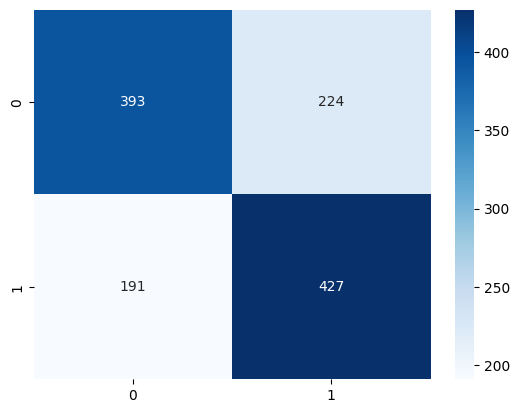

In [101]:
model_ml(X_train,y_train,X_test,y_test,LogisticRegression(max_iter = 1000))

**Gaussian Naive Bayes**

Model: GaussianNB()
Confusion Matrix of the model:
[[380 237]
 [182 436]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.68      0.62      0.64       617
           1       0.65      0.71      0.68       618

    accuracy                           0.66      1235
   macro avg       0.66      0.66      0.66      1235
weighted avg       0.66      0.66      0.66      1235



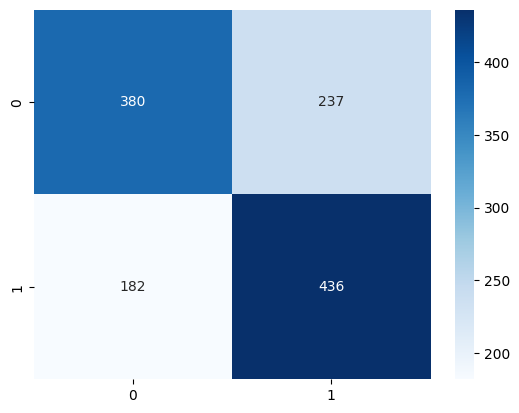

In [102]:
model_ml(X_train,y_train,X_test,y_test,GaussianNB())

**K-nearest Neighbours**

Model: KNeighborsClassifier(n_neighbors=3)
Confusion Matrix of the model:
[[433 184]
 [ 11 607]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82       617
           1       0.77      0.98      0.86       618

    accuracy                           0.84      1235
   macro avg       0.87      0.84      0.84      1235
weighted avg       0.87      0.84      0.84      1235



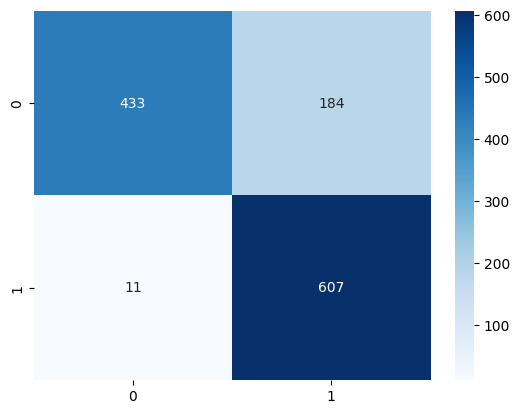

In [103]:
model_ml(X_train,y_train,X_test,y_test,KNeighborsClassifier(n_neighbors = 3))

**Decision Tree Classifier**

Model: DecisionTreeClassifier(min_samples_leaf=5)
Confusion Matrix of the model:
[[500 117]
 [143 475]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       617
           1       0.80      0.77      0.79       618

    accuracy                           0.79      1235
   macro avg       0.79      0.79      0.79      1235
weighted avg       0.79      0.79      0.79      1235



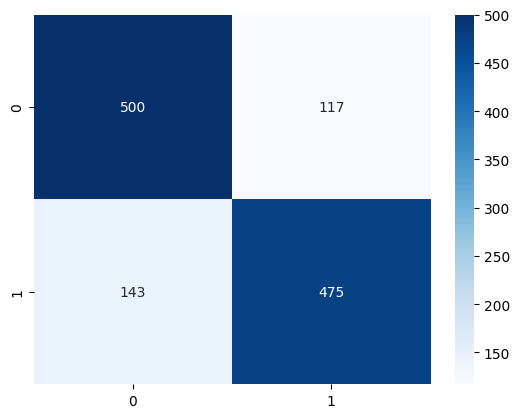

In [104]:
model_ml(X_train,y_train,X_test,y_test,DecisionTreeClassifier(min_samples_leaf=5,criterion='gini'))

**Random Forest Classifier**

Model: RandomForestClassifier()
Confusion Matrix of the model:
[[539  78]
 [ 64 554]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       617
           1       0.88      0.90      0.89       618

    accuracy                           0.89      1235
   macro avg       0.89      0.89      0.89      1235
weighted avg       0.89      0.89      0.89      1235



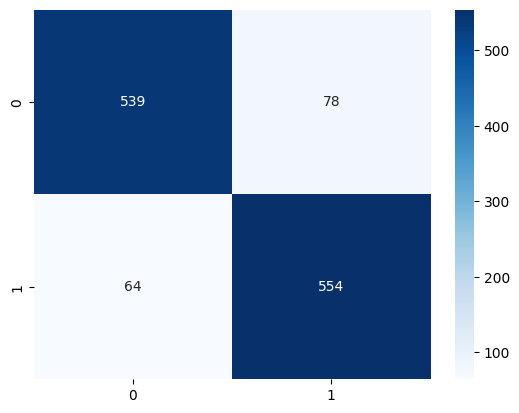

In [105]:
model_ml(X_train,y_train,X_test,y_test,RandomForestClassifier(n_estimators=100,criterion='gini'))

Model: AdaBoostClassifier()
Confusion Matrix of the model:
[[429 188]
 [146 472]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       617
           1       0.72      0.76      0.74       618

    accuracy                           0.73      1235
   macro avg       0.73      0.73      0.73      1235
weighted avg       0.73      0.73      0.73      1235



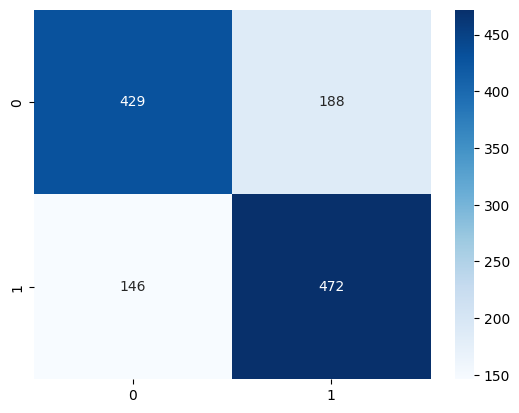

In [106]:
model_ml(X_train,y_train,X_test,y_test,AdaBoostClassifier())

Model: GradientBoostingClassifier()
Confusion Matrix of the model:
[[492 125]
 [ 98 520]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       617
           1       0.81      0.84      0.82       618

    accuracy                           0.82      1235
   macro avg       0.82      0.82      0.82      1235
weighted avg       0.82      0.82      0.82      1235



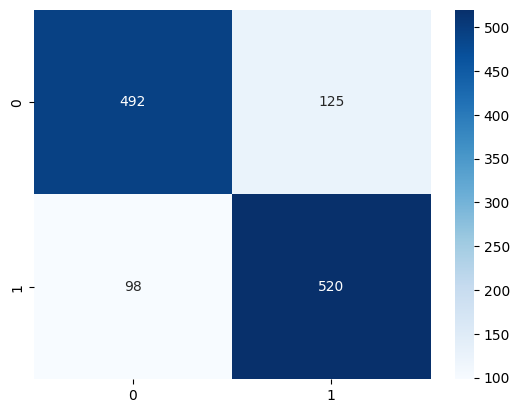

In [107]:
model_ml(X_train,y_train,X_test,y_test,GradientBoostingClassifier())

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Confusion Matrix of the model:
[[571  46]
 [ 85 533]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       617
           1       0.92      0.86   

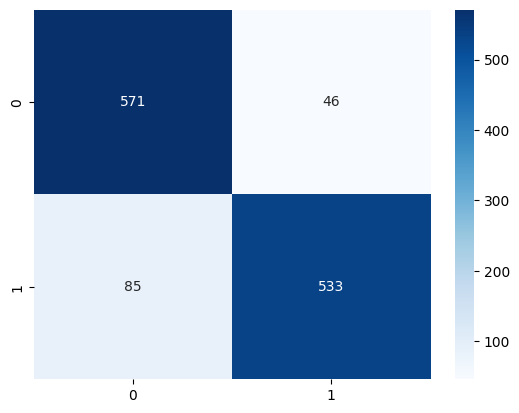

In [108]:
model_ml(X_train,y_train,X_test,y_test,XGBClassifier())

Model: <catboost.core.CatBoostClassifier object at 0x000002E554B42DD0>
Confusion Matrix of the model:
[[572  45]
 [ 85 533]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       617
           1       0.92      0.86      0.89       618

    accuracy                           0.89      1235
   macro avg       0.90      0.89      0.89      1235
weighted avg       0.90      0.89      0.89      1235



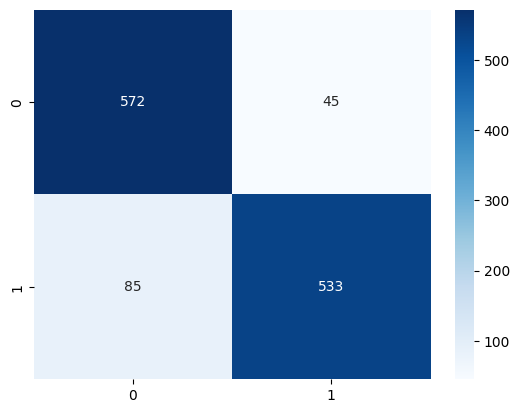

In [109]:
model_ml(X_train,y_train,X_test,y_test,CatBoostClassifier(verbose = False))

Model: SVC()
Confusion Matrix of the model:
[[363 254]
 [115 503]]
Classification report of the model:
              precision    recall  f1-score   support

           0       0.76      0.59      0.66       617
           1       0.66      0.81      0.73       618

    accuracy                           0.70      1235
   macro avg       0.71      0.70      0.70      1235
weighted avg       0.71      0.70      0.70      1235



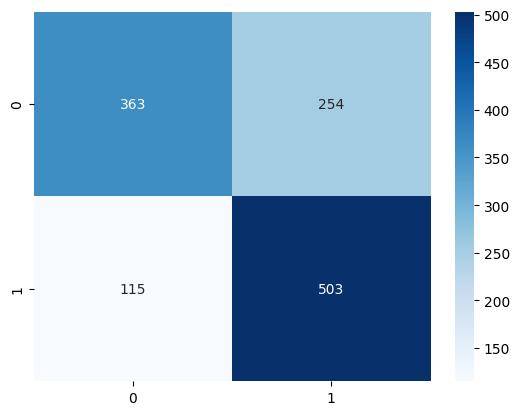

In [110]:
model_ml(X_train,y_train,X_test,y_test,SVC())

In [111]:
data = {
        'Name': model_name,
        'Accuracy':accuracy,
        'Precision': precision,
        'Recall':recall,
        'R2 value': r2score,
        'ROC-AUC':roc_auc,
        'F1 score': f1_score_before
}

models_score = pd.DataFrame(data)

In [112]:
models_score.sort_values(by='F1 score',ascending=False,inplace=True)

**Models with Highest F1-scores**

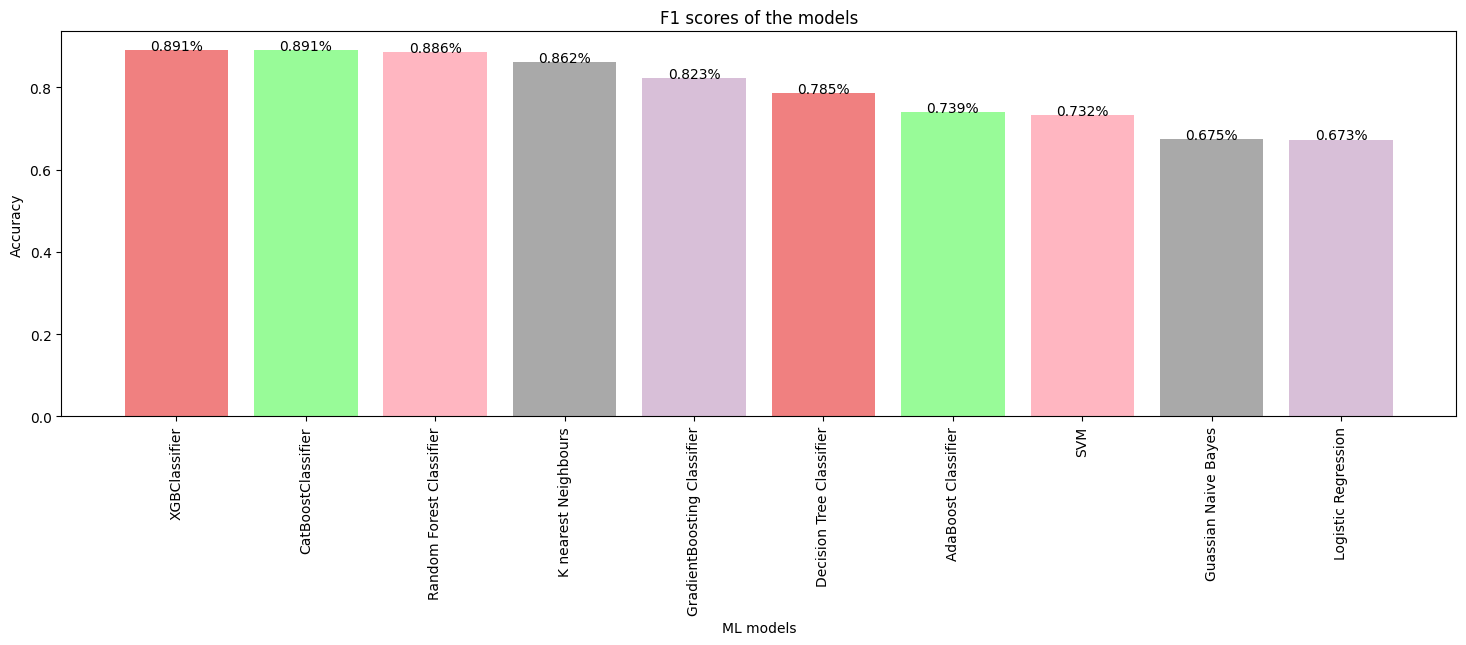

In [113]:
colors = ['lightcoral','palegreen','lightpink','darkgrey','thistle','lightcoral','palegreen','lightpink','darkgrey','thistle']
plt.figure(figsize = (18,5))
graph = plt.bar(x = models_score['Name'],height = models_score['F1 score'],color = colors)
plt.xticks(rotation = 90)
plt.xlabel('ML models')
plt.ylabel('Accuracy')
plt.title('F1 scores of the models')

i = 0
for val in graph:
    width = val.get_width()
    height = val.get_height()
    x, y = val.get_xy()
    plt.text(x+width/2,y+height*1,str(round(models_score['F1 score'].iloc[i],3))+'%',ha='center')
    i += 1
plt.show()

In [114]:
models_score.sort_values(by = 'F1 score',ascending = False).head()

Name  Accuracy  Precision  Recall  R2 value  \
7                XGBClassifier     0.894      0.921   0.862     0.576   
8           CatBoostClassifier     0.895      0.922   0.862     0.579   
4     Random Forest Classifier     0.885      0.877   0.896     0.540   
2         K nearest Neighbours     0.842      0.767   0.982     0.368   
6  GradientBoosting Classifier     0.819      0.806   0.841     0.278   

   ROC-AUC  F1 score  
7    0.894     0.891  
8    0.895     0.891  
4    0.885     0.886  
2    0.842     0.862  
6    0.819     0.823

We have got accuracies better now lets try to do hyperparameter tunning with GridsearchCV

### Logistic Regression

In [66]:
# storing important metrics for further analysis
from sklearn.metrics import accuracy_score,precision_score,r2_score,confusion_matrix,classification_report,roc_auc_score,recall_score,f1_score
f1_scores = []
r2score = []
accuracy = []
def get_scores(y_test,y_pred):
  r2score.append(round(r2_score(y_test,y_pred),3))
  f1_scores.append(round(f1_score(y_test,y_pred),3))
  accuracy.append(round(accuracy_score(y_test,y_pred),3))

Model: Logestic Regression


Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}



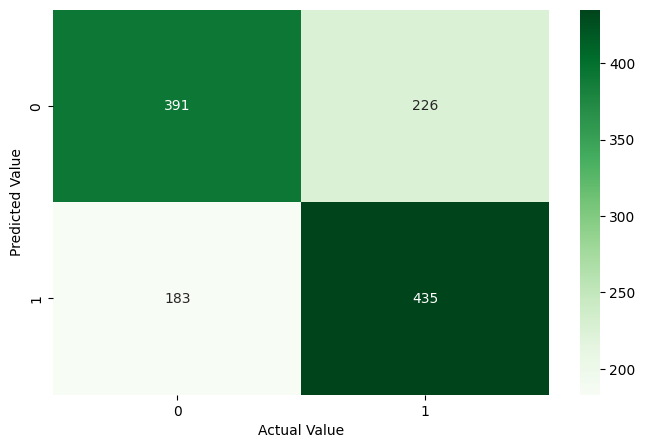

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       617
           1       0.66      0.70      0.68       618

    accuracy                           0.67      1235
   macro avg       0.67      0.67      0.67      1235
weighted avg       0.67      0.67      0.67      1235



In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# logestic regression parameters
params = {'penalty':['l1','l2'],
         'C':[0.001,0.01,0.1,1,10,100,1000],
         'solver':['liblinear']}
logistic_model = GridSearchCV(LogisticRegression(max_iter = 1000),param_grid=params,scoring = 'accuracy', cv=10)
print('Model: Logestic Regression')
#Fitting the Regression Model
logistic_model.fit(X_train,y_train)
print(f'Best parameters: {logistic_model.best_params_}\n')

#Predecting the target variable(y_hat)
logistic_pred = logistic_model.predict(X_test)
get_scores(y_test,logistic_pred)

#plotting confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,logistic_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification Report
print(classification_report(y_test,logistic_pred))

### Gaussian Naive Byes

{'var_smoothing': 1e-09}


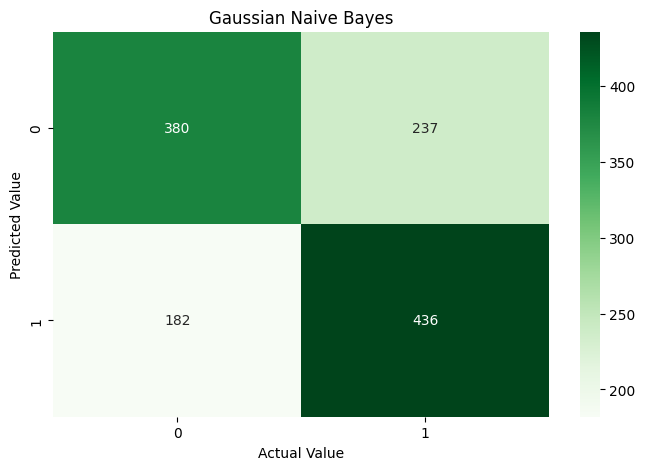

              precision    recall  f1-score   support

           0       0.68      0.62      0.64       617
           1       0.65      0.71      0.68       618

    accuracy                           0.66      1235
   macro avg       0.66      0.66      0.66      1235
weighted avg       0.66      0.66      0.66      1235



In [68]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes parameters
params = {'var_smoothing': [1e-9, 1e-7, 1e-5]}
nb_model = GridSearchCV(GaussianNB(), param_grid=params,scoring= 'accuracy',cv = 10)

nb_model.fit(X_train,y_train)
print(nb_model.best_params_)

nb_pred = nb_model.predict(X_test)
get_scores(y_test,nb_pred)

plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,nb_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Gaussian Naive Bayes')
plt.show()

print(classification_report(y_test,nb_pred))

### K Nearest Neighbour Classifier

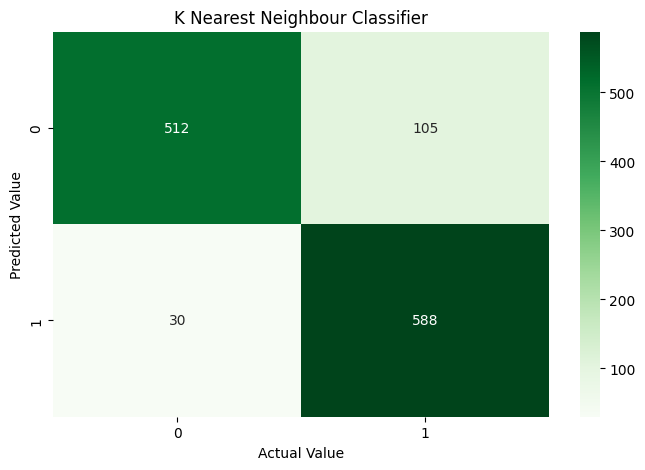

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       617
           1       0.85      0.95      0.90       618

    accuracy                           0.89      1235
   macro avg       0.90      0.89      0.89      1235
weighted avg       0.90      0.89      0.89      1235



In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params= {'n_neighbors': np.arange(1, 10),
         'weights': ['uniform','distance'],
         'algorithm': ['auto','kd_tree','brute']}

model_knn = GridSearchCV(KNeighborsClassifier(),param_grid=params,cv=10)

model_knn.fit(X_train,y_train)
model_knn.best_params_

Knn_predict = model_knn.predict(X_test)
get_scores(y_test,Knn_predict)

plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,Knn_predict),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('K Nearest Neighbour Classifier')
plt.show()

print(classification_report(y_test,Knn_predict))

### Decision Tree Classifier

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 3}


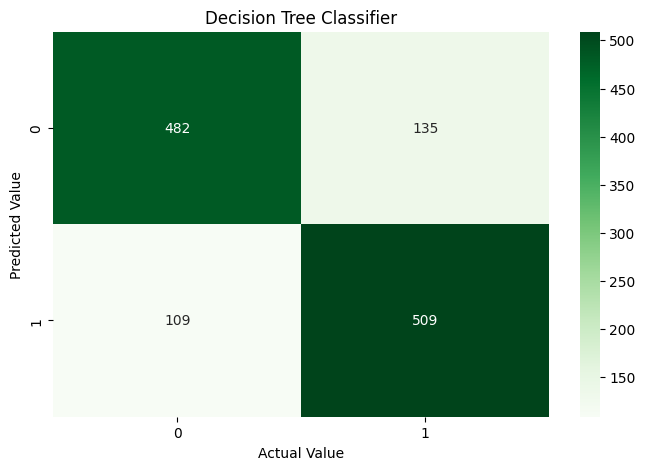

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       617
           1       0.79      0.82      0.81       618

    accuracy                           0.80      1235
   macro avg       0.80      0.80      0.80      1235
weighted avg       0.80      0.80      0.80      1235



In [70]:
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
          'min_samples_leaf':np.arange(1,10),
          'min_samples_split':np.arange(2,10)}
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=10), param_grid=params,scoring= 'accuracy')

tree_model.fit(X_train,y_train)
print(tree_model.best_params_)

tree_pred = tree_model.predict(X_test)
get_scores(y_test,tree_pred)

plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,tree_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Decision Tree Classifier')
plt.show()

print(classification_report(y_test,tree_pred))

### Random Forest Classifier

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}


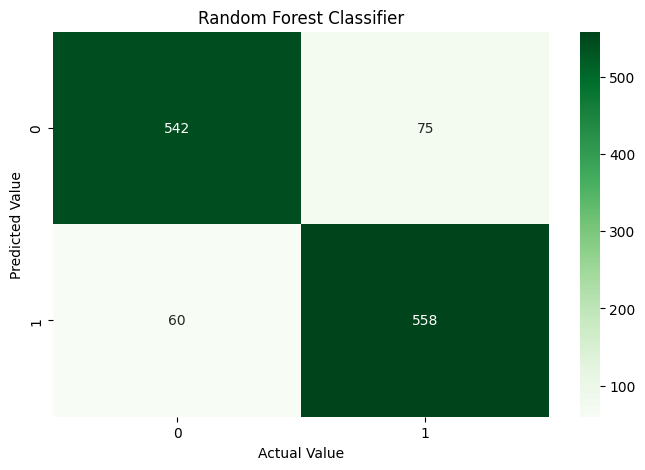

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       617
           1       0.88      0.90      0.89       618

    accuracy                           0.89      1235
   macro avg       0.89      0.89      0.89      1235
weighted avg       0.89      0.89      0.89      1235



In [71]:
from sklearn.ensemble import RandomForestClassifier

params = {'criterion': ['gini', 'entropy'],
          'min_samples_leaf':[1,2,3,4,5],
          'min_samples_split':[2,3,4,5]}
rf_model = GridSearchCV(RandomForestClassifier(random_state=10), param_grid=params,scoring= 'accuracy')

rf_model.fit(X_train,y_train)
print(rf_model.best_params_)

rf_pred = rf_model.predict(X_test)
get_scores(y_test,rf_pred)

plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Random Forest Classifier')
plt.show()

print(classification_report(y_test,rf_pred))

### **AdaBoost Classifier**

Model: AdaBoost Classifier


Best parameters: {'learning_rate': 1.0, 'n_estimators': 150}



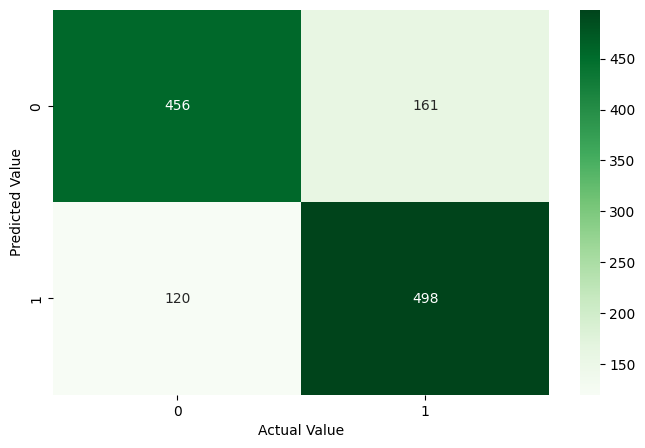

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       617
           1       0.76      0.81      0.78       618

    accuracy                           0.77      1235
   macro avg       0.77      0.77      0.77      1235
weighted avg       0.77      0.77      0.77      1235



In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# logestic regression parameters
params = {'n_estimators': [50, 100, 150],
          'learning_rate': [0.1, 0.5, 1.0]}
adaboost_model = GridSearchCV(AdaBoostClassifier(),param_grid=params,scoring = 'accuracy', cv=10)
print('Model: AdaBoost Classifier')
#Fitting the Classification Model
adaboost_model.fit(X_train,y_train)
print(f'Best parameters: {adaboost_model.best_params_}\n')

#Predecting the target variable(y_hat)
adaboost_pred = adaboost_model.predict(X_test)
get_scores(y_test,adaboost_pred)

#plotting confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,adaboost_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification Report
print(classification_report(y_test,adaboost_pred))

### **GradientBoosting Classifier**

Model: GradientBoosting Classifier


Best parameters: {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}



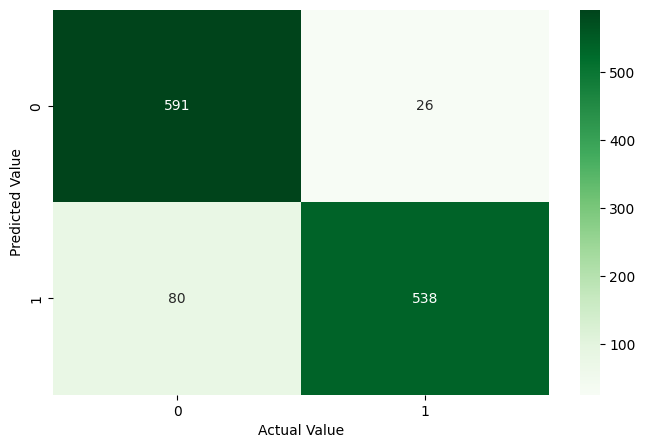

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       617
           1       0.95      0.87      0.91       618

    accuracy                           0.91      1235
   macro avg       0.92      0.91      0.91      1235
weighted avg       0.92      0.91      0.91      1235



In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# GradientBoosting  parameters
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.5],
          'max_depth': [3, 5, 7]}
gradientboost_model = GridSearchCV(GradientBoostingClassifier(),param_grid=params,scoring = 'accuracy', cv=10)
print('Model: GradientBoosting Classifier')
#Fitting the Classification Model
gradientboost_model.fit(X_train,y_train)
print(f'Best parameters: {gradientboost_model.best_params_}\n')

#Predecting the target variable(y_hat)
gradientboost_pred = gradientboost_model.predict(X_test)
get_scores(y_test,gradientboost_pred)

#plotting confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,gradientboost_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification Report
print(classification_report(y_test,gradientboost_pred))

### **XGBoost Classifier**

Model: XGBoost Classifier


Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}



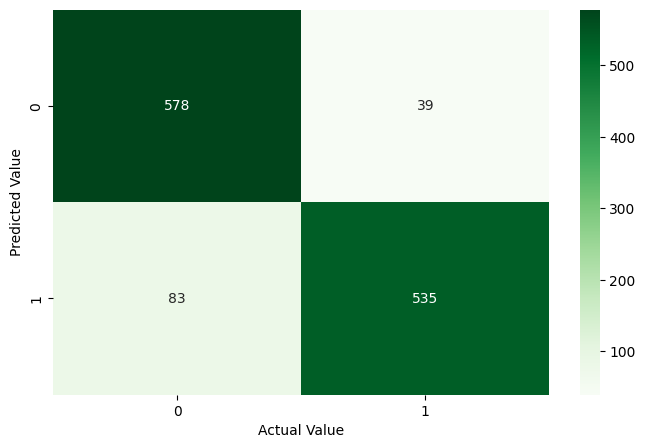

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       617
           1       0.93      0.87      0.90       618

    accuracy                           0.90      1235
   macro avg       0.90      0.90      0.90      1235
weighted avg       0.90      0.90      0.90      1235



In [74]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# XGBoost Classifier parameters
params = {'n_estimators': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.5],
          'max_depth': [3, 5, 7]}
xgb_model = GridSearchCV(XGBClassifier(),param_grid=params,scoring = 'accuracy', cv=10)
print('Model: XGBoost Classifier')
#Fitting the Regression Model
xgb_model.fit(X_train,y_train)
print(f'Best parameters: {xgb_model.best_params_}\n')

#Predecting the target variable(y_hat)
xgb_predict = xgb_model.predict(X_test)
get_scores(y_test,xgb_predict)

#plotting confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,xgb_predict),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification Report
print(classification_report(y_test,xgb_predict))

### **CatBoost Classifier**

Model: CatBoost Classifier
0:	learn: 0.6918820	total: 3.38ms	remaining: 166ms
1:	learn: 0.6906597	total: 6.51ms	remaining: 156ms
2:	learn: 0.6895427	total: 10.1ms	remaining: 158ms
3:	learn: 0.6886194	total: 13.1ms	remaining: 151ms
4:	learn: 0.6874717	total: 16.2ms	remaining: 146ms
5:	learn: 0.6863044	total: 19.5ms	remaining: 143ms
6:	learn: 0.6852836	total: 22.7ms	remaining: 139ms
7:	learn: 0.6842244	total: 26.1ms	remaining: 137ms
8:	learn: 0.6832084	total: 29.3ms	remaining: 133ms
9:	learn: 0.6822682	total: 32.3ms	remaining: 129ms
10:	learn: 0.6812935	total: 35.3ms	remaining: 125ms
11:	learn: 0.6802826	total: 39ms	remaining: 124ms
12:	learn: 0.6793112	total: 42.1ms	remaining: 120ms
13:	learn: 0.6782807	total: 45ms	remaining: 116ms
14:	learn: 0.6772176	total: 48.5ms	remaining: 113ms
15:	learn: 0.6762379	total: 52.2ms	remaining: 111ms
16:	learn: 0.6753529	total: 57.9ms	remaining: 112ms
17:	learn: 0.6744690	total: 61.2ms	remaining: 109ms
18:	learn: 0.6736472	total: 66.2ms	remaining: 108ms

23:	learn: 0.6692337	total: 83.1ms	remaining: 90ms
24:	learn: 0.6684427	total: 86ms	remaining: 86ms
25:	learn: 0.6675532	total: 88.9ms	remaining: 82ms
26:	learn: 0.6666983	total: 91.7ms	remaining: 78.1ms
27:	learn: 0.6658350	total: 94.1ms	remaining: 73.9ms
28:	learn: 0.6650037	total: 97.2ms	remaining: 70.4ms
29:	learn: 0.6642514	total: 99.5ms	remaining: 66.4ms
30:	learn: 0.6634354	total: 102ms	remaining: 62.2ms
31:	learn: 0.6628261	total: 104ms	remaining: 58.5ms
32:	learn: 0.6620524	total: 107ms	remaining: 54.9ms
33:	learn: 0.6613900	total: 110ms	remaining: 51.9ms
34:	learn: 0.6607637	total: 114ms	remaining: 48.7ms
35:	learn: 0.6599975	total: 117ms	remaining: 45.3ms
36:	learn: 0.6594455	total: 119ms	remaining: 42ms
37:	learn: 0.6588933	total: 123ms	remaining: 38.7ms
38:	learn: 0.6582840	total: 126ms	remaining: 35.5ms
39:	learn: 0.6575412	total: 128ms	remaining: 32.1ms
40:	learn: 0.6570043	total: 131ms	remaining: 28.7ms
41:	learn: 0.6563464	total: 133ms	remaining: 25.4ms
42:	learn: 0.65

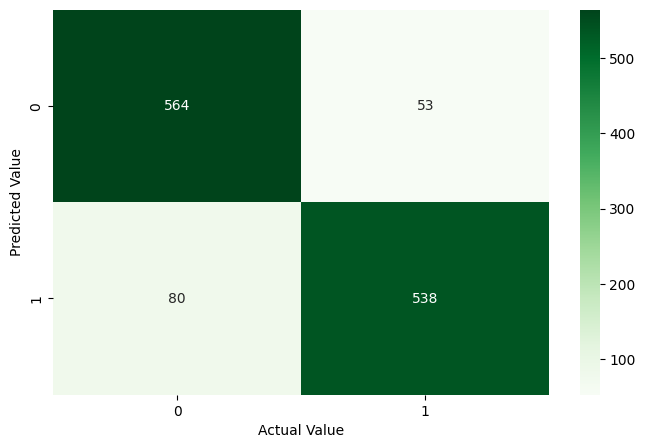

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       617
           1       0.91      0.87      0.89       618

    accuracy                           0.89      1235
   macro avg       0.89      0.89      0.89      1235
weighted avg       0.89      0.89      0.89      1235



In [75]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# CatBoost Classifier parameters
params = {'iterations': [50, 100, 200],
          'learning_rate': [0.01, 0.1, 0.5],
          'depth': [3, 5, 7]}
catboost_model = GridSearchCV(CatBoostClassifier(),param_grid=params,scoring = 'accuracy', cv=10)
print('Model: CatBoost Classifier')
#Fitting the Classification Model
catboost_model.fit(X_train,y_train)
print(f'Best parameters: {catboost_model.best_params_}\n')

#Predecting the target variable(y_hat)
catboost_pred = catboost_model.predict(X_test)
get_scores(y_test,catboost_pred)

#plotting confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,catboost_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification Report
print(classification_report(y_test,catboost_pred))

### **Support Vector Machine**

Model: Logestic Regression


Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}



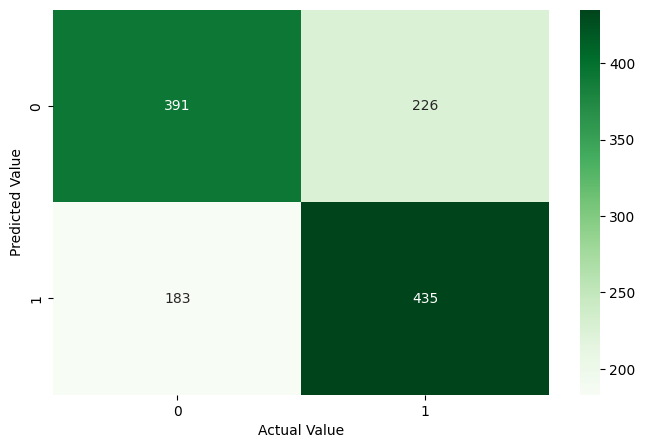

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       617
           1       0.66      0.70      0.68       618

    accuracy                           0.67      1235
   macro avg       0.67      0.67      0.67      1235
weighted avg       0.67      0.67      0.67      1235



In [76]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# logestic regression parameters
params = {'C': [0.1, 1, 10],
          'kernel': ['linear', 'poly'],
          'gamma': ['scale', 'auto']}
svm_model = GridSearchCV(SVC(probability=True),param_grid=params,scoring = 'accuracy', cv=10)
print('Model: Logestic Regression')
#Fitting the Regression Model
svm_model.fit(X_train,y_train)
print(f'Best parameters: {svm_model.best_params_}\n')

#Predecting the target variable(y_hat)
svm_pred = logistic_model.predict(X_test)
get_scores(y_test,svm_pred)

#plotting confusion matrix
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test,svm_pred),annot = True,fmt='d',cmap = 'Greens')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# Classification Report
print(classification_report(y_test,svm_pred))

In [77]:
hyper_parameter_result = pd.DataFrame([model_name,f1_scores]).T
hyper_parameter_result.columns = ['Model_Name', 'F1_Score']
hyper_parameter_result.sort_values(by='F1_Score', ascending=False, inplace=True)
hyper_parameter_result.reset_index(inplace=True,drop=True)
hyper_parameter_result

Model_Name F1_Score
0  GradientBoosting Classifier     0.91
1                XGBClassifier    0.898
2         K nearest Neighbours    0.897
3     Random Forest Classifier    0.892
4           CatBoostClassifier     0.89
5     Decision Tree Classifier    0.807
6          AdaBoost Classifier     0.78
7          Logistic Regression     0.68
8                          SVM     0.68
9         Guassian Naive Bayes    0.675

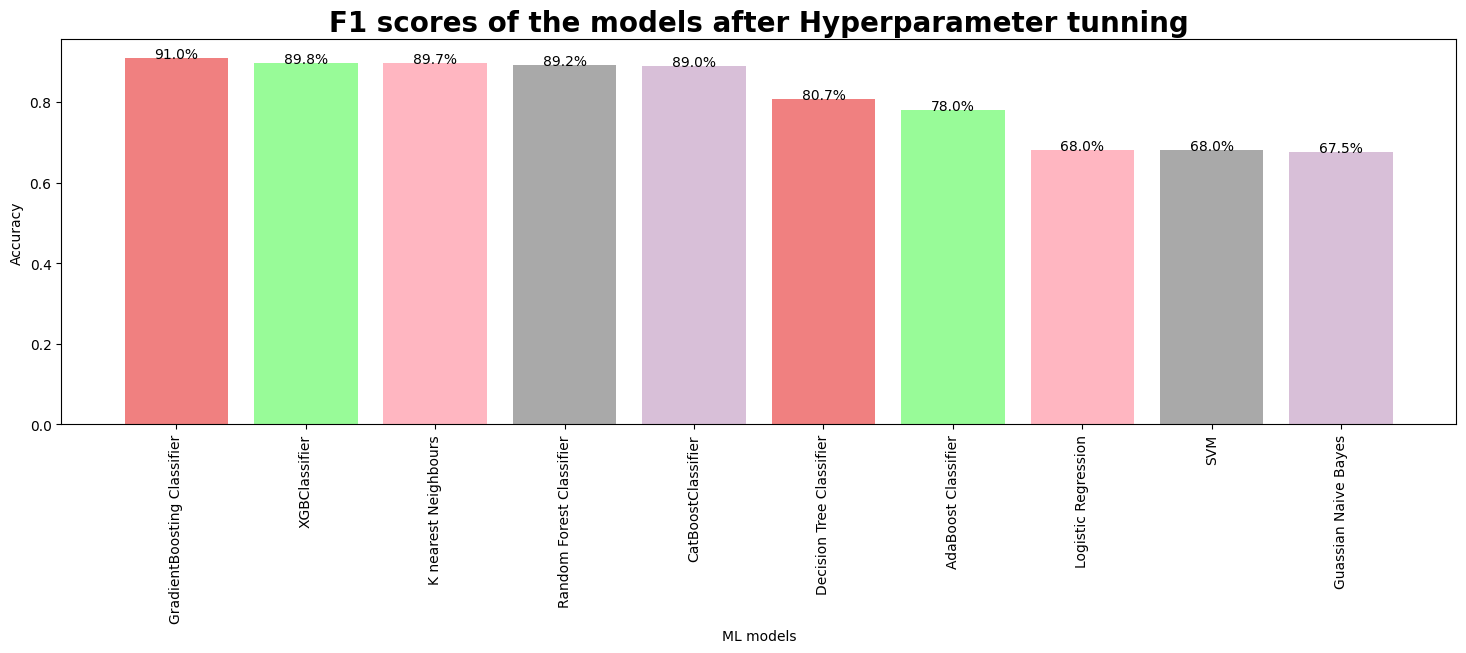

In [78]:
colors = ['lightcoral','palegreen','lightpink','darkgrey','thistle','lightcoral','palegreen','lightpink','darkgrey','thistle']
plt.figure(figsize = (18,5))
graph = plt.bar(x = hyper_parameter_result['Model_Name'],height = hyper_parameter_result['F1_Score'],color = colors)
plt.xticks(rotation = 90)
plt.xlabel('ML models')
plt.ylabel('Accuracy')
plt.title('F1 scores of the models after Hyperparameter tunning', fontsize = 20, fontweight = 'bold')

i = 0
for val in graph:
    width = val.get_width()
    height = val.get_height()
    x, y = val.get_xy()
    plt.text(x+width/2,y+height*1,str(round(100 * hyper_parameter_result.F1_Score[i],3))+'%',ha='center')
    i += 1
plt.show()

In [79]:
r_probs = [0 for _ in range(len(X_test))]
lg_probs = logistic_model.predict_proba(X_test)
nb_probs = nb_model.predict_proba(X_test)
knn_probs = model_knn.predict_proba(X_test)
tree_probs = tree_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
ada_probs = adaboost_model.predict_proba(X_test)
gb_probs = gradientboost_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)
cat_probs = catboost_model.predict_proba(X_test)
# svm_probs = svm_model.decision_function(X_test)

In [80]:
lg_probs = lg_probs[:,1]
nb_probs = nb_probs[:,1]
knn_probs = knn_probs[:,1]
tree_probs = tree_probs[:,1]
rf_probs = rf_probs[:,1]
ada_probs = ada_probs[:,1]
gb_probs = gb_probs[:,1]
xgb_probs = xgb_probs[:,1]
cat_probs = cat_probs[:,1]
# svm_probs = svm_probs[:,1]

In [81]:
from sklearn.metrics import roc_curve,roc_auc_score

r_auc = roc_auc_score(y_test,r_probs)
lg_auc = roc_auc_score(y_test,lg_probs)
nb_auc = roc_auc_score(y_test,nb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
tree_auc = roc_auc_score(y_test,tree_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
ada_auc = roc_auc_score(y_test,ada_probs)
gb_auc = roc_auc_score(y_test,gb_probs)
xgb_auc = roc_auc_score(y_test,xgb_probs)
cat_auc = roc_auc_score(y_test,cat_probs)

In [82]:
print('Random Chace prediction AUCROC: % .3f'% r_auc)
print('Logistic Regression prediction AUCROC: % .3f'% lg_auc)
print('Gaussian Naive Bayes prediction AUCROC: % .3f'% nb_auc)
print('K Nearest Neighbours prediction AUCROC: % .3f'% knn_auc)
print('Decision Tree Classifier prediction AUCROC: % .3f'% tree_auc)
print('Random Forest Classifier prediction AUCROC: % .3f'% rf_auc)
print('ADABoost Classifier prediction AUCROC: % .3f'% ada_auc)
print('GradientBoost Classifier prediction AUCROC: % .3f'% gb_auc)
print('XGBoost Classifier prediction AUCROC: % .3f'% xgb_auc)
print('CatBoost Classifier prediction AUCROC: % .3f'% cat_auc)

Random Chace prediction AUCROC:  0.500
Logistic Regression prediction AUCROC:  0.706
Gaussian Naive Bayes prediction AUCROC:  0.710
K Nearest Neighbours prediction AUCROC:  0.905
Decision Tree Classifier prediction AUCROC:  0.804
Random Forest Classifier prediction AUCROC:  0.959
ADABoost Classifier prediction AUCROC:  0.850
GradientBoost Classifier prediction AUCROC:  0.959
XGBoost Classifier prediction AUCROC:  0.955
CatBoost Classifier prediction AUCROC:  0.961


In [83]:
r_fpr,r_tpr,_ = roc_curve(y_test,r_probs)
lg_fpr,lg_tpr,_ = roc_curve(y_test,lg_probs)
nb_fpr,nb_tpr, _ = roc_curve(y_test,nb_probs)
knn_fpr,knn_tpr,_ = roc_curve(y_test,knn_probs)
tree_fpr,tree_tpr,_ = roc_curve(y_test,tree_probs)
rf_fpr,rf_tpr,_ = roc_curve(y_test,rf_probs)
ada_fpr,ada_tpr,_ = roc_curve(y_test,ada_probs)
gb_fpr,gb_tpr,_ = roc_curve(y_test,gb_probs)
xgb_fpr,xgb_tpr,_ = roc_curve(y_test,xgb_probs)
cat_fpr,cat_tpr,_ = roc_curve(y_test,cat_probs)

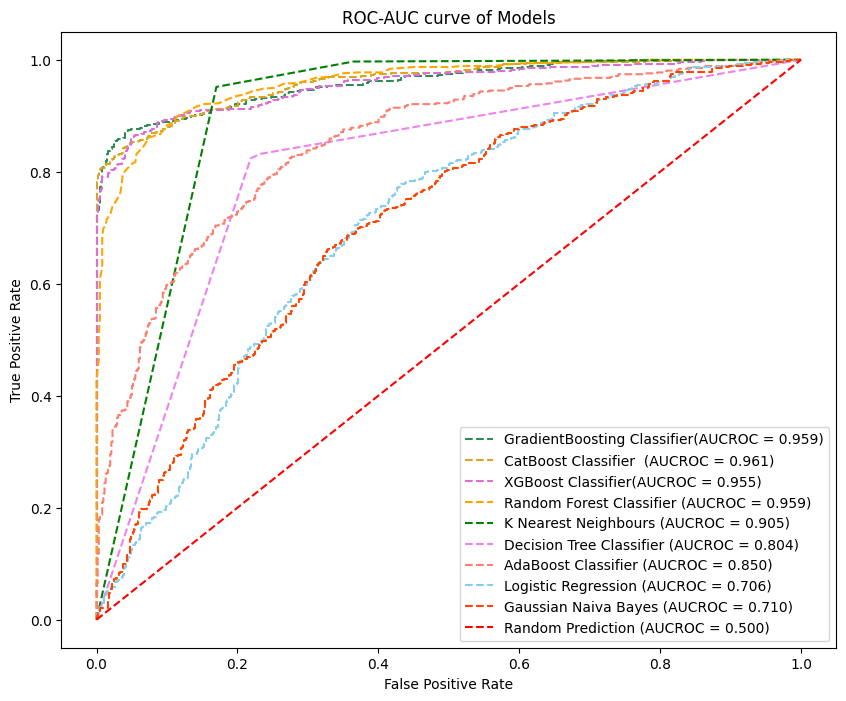

In [84]:
plt.figure(figsize = (10,8))
plt.plot(gb_fpr,gb_tpr,linestyle = '--',label = 'GradientBoosting Classifier(AUCROC = %.3f)'% gb_auc,color = 'seagreen')
plt.plot(cat_fpr,cat_tpr,linestyle = '--',label = 'CatBoost Classifier  (AUCROC = %.3f)'% cat_auc,color = 'goldenrod')
plt.plot(xgb_fpr,xgb_tpr,linestyle = '--',label = 'XGBoost Classifier(AUCROC = %.3f)'% xgb_auc,color = 'orchid')
plt.plot(rf_fpr,rf_tpr,linestyle = '--',label = 'Random Forest Classifier (AUCROC = %.3f)'% rf_auc,color = 'orange')
plt.plot(knn_fpr,knn_tpr,linestyle = '--',label = 'K Nearest Neighbours (AUCROC = %.3f)'% knn_auc,color = 'green')
plt.plot(tree_fpr,tree_tpr,linestyle = '--',label = 'Decision Tree Classifier (AUCROC = %.3f)'% tree_auc,color = 'violet')
plt.plot(ada_fpr,ada_tpr,linestyle = '--',label = 'AdaBoost Classifier (AUCROC = %.3f)'% ada_auc,color = 'salmon')
plt.plot(lg_fpr,lg_tpr,linestyle = '--',label = 'Logistic Regression (AUCROC = %.3f)'% lg_auc,color = 'skyblue')
plt.plot(nb_fpr,nb_tpr,linestyle = '--',label = 'Gaussian Naiva Bayes (AUCROC = %.3f)'% nb_auc,color = 'orangered')
plt.plot(r_fpr,r_tpr,linestyle = '--',label = 'Random Prediction (AUCROC = %.3f)'% r_auc,color = 'red')

plt.title('ROC-AUC curve of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [121]:
roc_auc_before = models_score['ROC-AUC'].to_list()
roc_auc_after = [lg_auc,nb_auc,knn_auc,tree_auc,rf_auc,ada_auc,gb_auc,xgb_auc,cat_auc]

In [127]:
len(roc_auc_before),len(roc_auc_after)

(9, 9)

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(18,5))
# fig.figure(figsize=(10,5))
graph1=axs.bar(model_name, roc_auc_before, -0.35, align='edge',  color='lightcoral',label = 'Before')
graph2=axs.bar(model_name, roc_auc_after, 0.35, align='edge', color='yellowgreen',label = 'After')
plt.title('AUC-values before and after Hyper-parameter tunning')
plt.xlabel('Models')
plt.ylabel('AUC values')
plt.xticks(rotation=30)
plt.legend()
plt.show()


## Best_Model = GradientBoostingClassifier with any accuracy of 91.1% and has an AUC-value of 0.959

**Save Model to a Pickle FIle**

In [128]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(gradientboost_model, file)

**Loading the saved pickle file model**

In [129]:
with open('model1.pkl', 'rb') as file:
    final_model = pickle.load(file)

In [130]:
final_model

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [131]:
y_pred_pickle = final_model.predict(X_test)
y_pred_pickle

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [132]:
accuracy_score(y_test[:100], y_pred_pickle[:100])

0.92

In [ ]:
X_train

age  cigarettes_per_day  total_cholestrol       BMI  heart_rate  \
2294  0.263158            0.000000          0.396396  0.265501    0.446429   
4662  0.846330            0.000000          0.705380  0.369308    0.336419   
1268  0.526316            0.000000          0.635135  0.504505    0.053571   
2412  0.394737            0.200000          0.405405  0.410705    0.410714   
4708  0.441766            0.635039          0.563063  0.627206    0.500000   
...        ...                 ...               ...       ...         ...   
696   0.684211            0.000000          0.639640  0.750397    0.857143   
3803  0.871889            0.000000          0.553391  0.721012    0.798865   
4818  0.617792            0.682146          0.678572  0.551854    0.446429   
464   0.210526            0.000000          0.531532  0.011129    0.196429   
1918  0.315789            0.400000          0.310811  0.386328    0.500000   

       glucose       MAP  education_2.0  education_3.0  education_4.0  
2294  0.509804  0.291771              0              1              0  
4662  0.619497  0.246547              0              0              1  
1268  0.431373  0.690773              0              0              0  
2412  0.470588  0.640898              0              0              1  
4708  0.447227  0.569338              1              0              0  
...        ...       ...            ...            ...            ...  
696   0.921569  0.551122              0              1              0  
3803  0.708922  0.652458              1              0              0  
4818  0.515639  0.656362              0              1              0  
464   0.294118  0.331671              1              0              0  
1918  0.470588  0.581047              0              0              0  

[4939 rows x 10 columns]

In [133]:
final_model.predict([[61,30,225,28.58,65,103,82,0,1,0]])

array([1], dtype=int64)

In [ ]:
X_test

age  cigarettes_per_day  total_cholestrol       BMI  heart_rate  \
32    0.105263            0.000000          0.252252  0.598834    0.428571   
796   0.447368            0.000000          0.617117  0.236354    0.500000   
5242  0.616225            0.011669          0.571725  0.532557    0.470247   
1487  0.763158            0.000000          0.612613  0.549020    0.339286   
5770  0.503887            0.414772          0.462529  0.254769    0.517249   
...        ...                 ...               ...       ...         ...   
5784  0.626550            0.419110          0.880442  0.376644    0.690515   
1570  0.921053            0.060000          0.909910  0.431902    0.678571   
905   0.394737            0.300000          0.581081  0.425013    0.589286   
5296  0.631579            0.000000          0.644894  0.391699    0.681474   
3907  0.818795            0.000000          0.656370  0.393562    0.405608   

       glucose       MAP  education_2.0  education_3.0  education_4.0  
32    0.529412  0.316708              0              1              0  
796   0.431373  0.488778              1              0              0  
5242  0.830075  0.439746              0              1              0  
1487  0.745098  0.511222              1              0              0  
5770  0.463234  0.366584              0              0              0  
...        ...       ...            ...            ...            ...  
5784  0.648932  0.790475              0              1              0  
1570  0.470588  0.598504              1              0              0  
905   0.549020  0.586035              1              0              0  
5296  0.402917  0.671167              0              0              1  
3907  0.517650  0.345351              0              0              0  

[1235 rows x 10 columns]